<a href="https://colab.research.google.com/github/FathimabeeviT/Breast_Cancer_ML/blob/main/Classification_of_Satellite_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classification of Satellite Images**

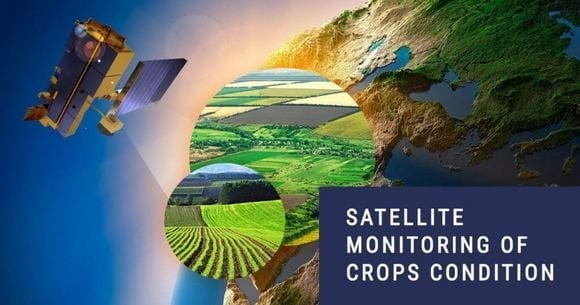

In [ ]:

from IPython.display import Image
Image('c64eh72p.png')



#Introduction
The use of satellite imagery combined with crowdsourced geospatial data has gained attention for solving complex environmental and urban planning problems. This project addresses one such challenge: classifying land cover types from satellite images using crowdsourced data from OpenStreetMap. The goal is to automate the classification of satellite images into distinct land cover classes such as impervious surfaces, farms, forests, grasslands, orchards, and water bodies. The problem arises from the need to efficiently manage and monitor large geographic areas for various applications, including environmental conservation, agricultural management, and urban planning. However, both the images and crowdsourced data often contain noise, which makes the classification task challenging. Accurate classification can improve the ability to monitor land use changes, plan resources, and optimize land management practices.

#Objective

Objective: Develop a machine learning model to classify satellite images into six land cover classes (impervious, farm, forest, grass, orchard, water) using crowdsourced data from OpenStreetMap and Landsat satellite imagery, despite noisy data.


Environmental Monitoring: Track land use and vegetation changes.
Urban Planning: Inform infrastructure and green space decisions.
Resource Management: Efficiently manage agricultural lands, forests, and water bodies.
Cost-Effective: Reduce the need for extensive field surveys.





#Data Story
This project aims to automate land cover classification by  time-series satellite imagery from Landsat (2014-2015) and crowdsourced geospatial data from OpenStreetMap. The dataset includes NDVI values to classify six land cover types: impervious surfaces, farms, forests, grasslands, orchards, and water bodies. A key challenge is the presence of noise in the training data due to cloud cover and labeling inaccuracies in the crowdsourced polygons. Using machine learning techniques, the project focuses on preprocessing noisy data, feature selection, and accurate classification, demonstrating the potential to speed up land cover analysis for environmental monitoring.

# Code

In [ ]:
# IMPORT LIBRARRIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix,classification_report,precision_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

numpy and pandas: Used for handling and processing data.

matplotlib and seaborn: For visualization.

scikit-learn modules: For machine learning models, data preprocessing, and evaluation metrics.

**LOAD DATASET**

In [ ]:
data= pd.read_csv('/training.csv')
data.head()

,class,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,water,997.904,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,-1628.240,...,-921.193,-1043.160,-1942.490,267.138,366.608,452.238,211.328,-2203.02,-1180.190,433.906
1,water,914.198,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,-954.719,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.00,-1360.560,524.075
2,water,3800.810,1671.3400,1206.880,449.735,1071.21,546.371,1077.840,214.564,849.599,...,1562.210,1566.160,2208.440,1056.600,385.203,300.560,293.730,2762.57,150.931,3800.810
3,water,952.178,58.0174,-1599.160,210.714,-1052.63,578.807,-1564.630,-858.390,729.790,...,-1025.880,368.622,-1786.950,-1227.800,304.621,291.336,369.214,-2202.12,600.359,-1343.550
4,water,1232.120,72.5180,-1220.880,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.950,155.624,-1189.710,-924.073,432.150,282.833,298.320,-2197.36,626.379,-826.727


The dataset of Crowedsourced Open Street Map  is loaded into a Pandas DataFrame from a CSV file.

data.head() displays the first 5 rows to get a quick overview of the data.

In [ ]:
# view basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10545 entries, 0 to 10544
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       10545 non-null  object 
 1   max_ndvi    10545 non-null  float64
 2   20150720_N  10545 non-null  float64
 3   20150602_N  10545 non-null  float64
 4   20150517_N  10545 non-null  float64
 5   20150501_N  10545 non-null  float64
 6   20150415_N  10545 non-null  float64
 7   20150330_N  10545 non-null  float64
 8   20150314_N  10545 non-null  float64
 9   20150226_N  10545 non-null  float64
 10  20150210_N  10545 non-null  float64
 11  20150125_N  10545 non-null  float64
 12  20150109_N  10545 non-null  float64
 13  20141117_N  10545 non-null  float64
 14  20141101_N  10545 non-null  float64
 15  20141016_N  10545 non-null  float64
 16  20140930_N  10545 non-null  float64
 17  20140813_N  10545 non-null  float64
 18  20140626_N  10545 non-null  float64
 19  20140610_N  10545 non-nul

This command provides basic information about the dataset, including column names, data types, and non-null counts, helping understand the structure of  data.

Dataframe

Range Index; 0 - 10544
(total rows 10545)

Total columns 29

columns name, Number of total rows values, datatypes.

 Datatype of Target column(class) is object

  Datatypes of featuers are float(numeric)




In [ ]:
# Display statistical summary of the dataset
data.describe()

,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,...,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000,10545.000000
mean,7282.721268,5713.832981,4777.434284,4352.914883,5077.372030,2871.423540,4898.348680,3338.303406,4902.600296,4249.307925,...,4787.492858,3640.367446,3027.313647,3022.054677,2041.609136,2691.604363,2058.300423,6109.309315,2563.511596,2558.926018
std,1603.782784,2283.945491,2735.244614,2870.619613,2512.162084,2675.074079,2578.318759,2421.309390,2691.397266,2777.809493,...,2745.333581,2298.281052,2054.223951,2176.307289,2020.499263,2408.279935,2212.018257,1944.613487,2336.052498,2413.851082
min,563.444000,-433.735000,-1781.790000,-2939.740000,-3536.540000,-1815.630000,-5992.080000,-1677.600000,-2624.640000,-3403.050000,...,-3765.860000,-1043.160000,-4869.010000,-1505.780000,-1445.370000,-4354.630000,-232.292000,-6807.550000,-2139.860000,-4145.250000
25%,7285.310000,4027.570000,2060.600000,1446.940000,2984.370000,526.911000,2456.310000,1017.710000,2321.550000,1379.210000,...,2003.930000,1392.390000,1405.020000,1010.180000,429.881000,766.451000,494.858000,5646.670000,689.922000,685.680000
50%,7886.260000,6737.730000,5270.020000,4394.340000,5584.070000,1584.970000,5638.400000,2872.980000,5672.730000,4278.880000,...,5266.930000,3596.680000,2671.400000,2619.180000,1245.900000,1511.180000,931.713000,6862.060000,1506.570000,1458.870000
75%,8121.780000,7589.020000,7484.110000,7317.950000,7440.210000,5460.080000,7245.040000,5516.610000,7395.610000,7144.480000,...,7549.430000,5817.750000,4174.010000,4837.610000,3016.520000,4508.510000,2950.880000,7378.020000,4208.730000,4112.550000
max,8650.500000,8377.720000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,8422.060000,...,8489.970000,7981.820000,8445.410000,7919.070000,8206.780000,8235.400000,8247.630000,8410.330000,8418.230000,8502.020000


It provide numerical values.

 This command returns summary statistics for the numeric columns, including the average, standard deviation, lowest, highest values, and percentiles, helping to understand the distribution of features.

In [ ]:
#To find how many times is value appears in the class column
data["class"].value_counts()

,count
class,
forest,7431
farm,1441
impervious,969
grass,446
water,205
orchard,53


This shows how many instances belong to each class (land cover type). It helps to identify if the dataset is imbalanced.

<ipython-input-7-5814999e203e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='class',order=data['class'].value_counts().index,palette="Set2")


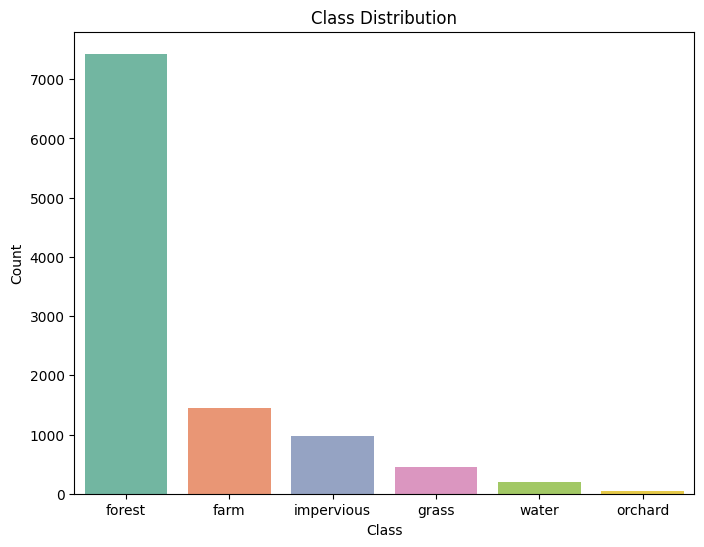

In [ ]:

# plotting class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='class',order=data['class'].value_counts().index,palette="Set2")
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


 This plot helps identify any imbalances in the classes that could affect model training and suggest the need for data balancing methods like SMOTE.


## Handling missing values

In [ ]:
# check missing values
data.isnull().sum()

,0
class,0
max_ndvi,0
20150720_N,0
20150602_N,0
20150517_N,0
20150501_N,0
20150415_N,0
20150330_N,0
20150314_N,0
20150226_N,0


No missing values in this dataset

In [ ]:
# check duplicated values
data.duplicated().sum()

1

One duplicated data in this dataset

In [ ]:
# drop duplicated values
data.drop_duplicates(inplace=True)

Delete the duplicated data

In [ ]:
# check the total rows of the dataset
data.shape

(10544, 29)

In [ ]:
num_data=data.select_dtypes(include=['number'])
num_data

,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,997.904,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,-1628.240,-1325.64,...,-921.193,-1043.160,-1942.490,267.138,366.608,452.238,211.328,-2203.02,-1180.190,433.906
1,914.198,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,-1408.64,...,-954.719,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.00,-1360.560,524.075
2,3800.810,1671.3400,1206.880,449.735,1071.21,546.371,1077.840,214.564,849.599,1283.63,...,1562.210,1566.160,2208.440,1056.600,385.203,300.560,293.730,2762.57,150.931,3800.810
3,952.178,58.0174,-1599.160,210.714,-1052.63,578.807,-1564.630,-858.390,729.790,-3162.14,...,-1025.880,368.622,-1786.950,-1227.800,304.621,291.336,369.214,-2202.12,600.359,-1343.550
4,1232.120,72.5180,-1220.880,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,-2829.40,...,-1813.950,155.624,-1189.710,-924.073,432.150,282.833,298.320,-2197.36,626.379,-826.727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10540,7579.580,6072.5000,3803.140,3902.220,3897.43,3767.050,3985.770,4122.540,4240.230,5240.53,...,7340.160,5513.730,1538.240,3507.360,1099.800,461.336,406.031,4652.03,2774.980,500.864
10541,2780.930,1895.6800,1454.740,1265.480,1033.56,1930.380,1057.150,1471.600,1427.340,2693.63,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.65,2501.720,1247.770
10542,5833.760,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,770.469,2886.59,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,315.503,3759.71,3267.170,388.346
10543,3079.310,2435.3000,1444.400,1133.760,1278.74,927.765,1917.040,1514.920,1685.130,1644.49,...,1686.860,2050.940,1848.100,1725.820,1935.410,2089.710,668.160,1880.59,1614.840,1518.980


**Skewness**

In [ ]:
num_data.skew()

,0
max_ndvi,-2.468086
20150720_N,-0.873994
20150602_N,-0.272846
20150517_N,-0.042400
20150501_N,-0.435767
20150415_N,0.649113
20150330_N,-0.469061
20150314_N,0.317307
20150226_N,-0.465159
20150210_N,-0.031622


 **Outliers**

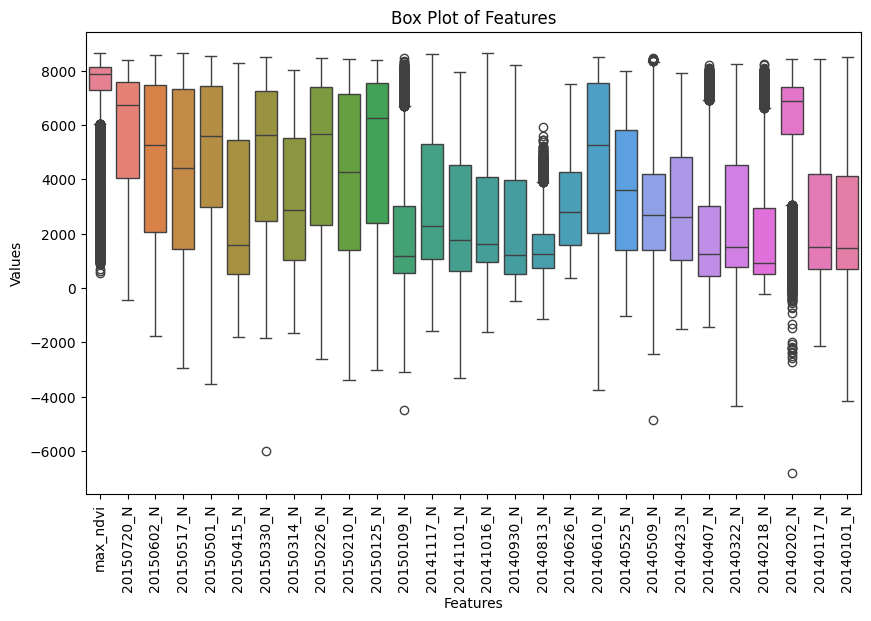

In [ ]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop('class', axis=1))
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.show()



Outliers can negatively impact model training and predictions. Identifying and removing them can lead to a cleaner dataset.Outliers will be clearly marked in the box plots, allowing you to assess which features might need further cleaning using methods like IQR.

Outliers are data points that are very different from most of the other data points. In a box plot, these outliers are shown as individual points outside the “whiskers” (the lines extending from the box).

Whiskers: The lines that extend from the top and bottom of the box.
Outliers: Points outside these lines. They are unusual values that dont fit with the rest of the data

In [ ]:
numeric_col=data.select_dtypes(include=[ 'float64']).columns
numeric_col

Index(['max_ndvi', '20150720_N', '20150602_N', '20150517_N', '20150501_N',
       '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N',
       '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N',
       '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N',
       '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N',
       '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

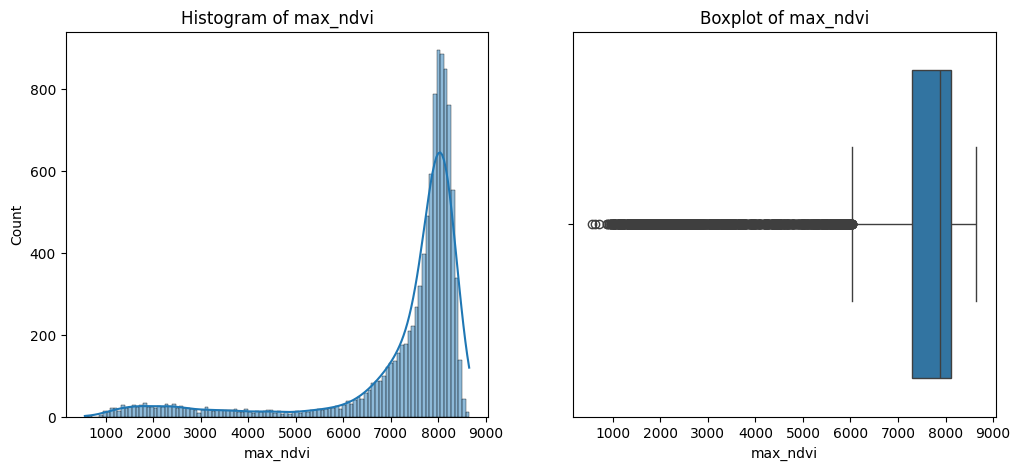

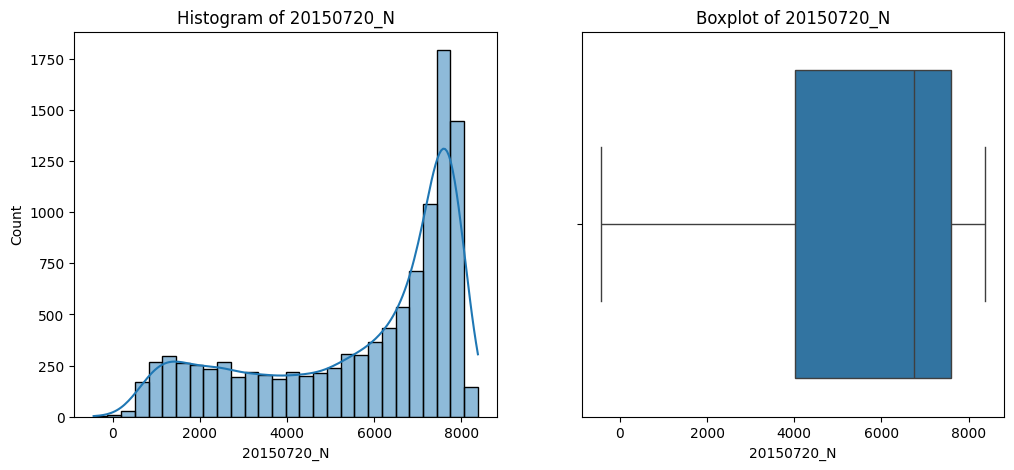

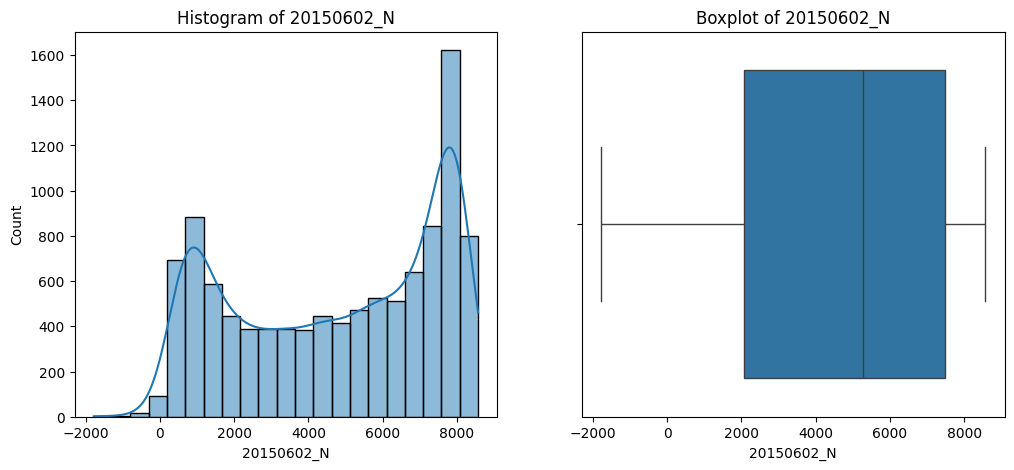

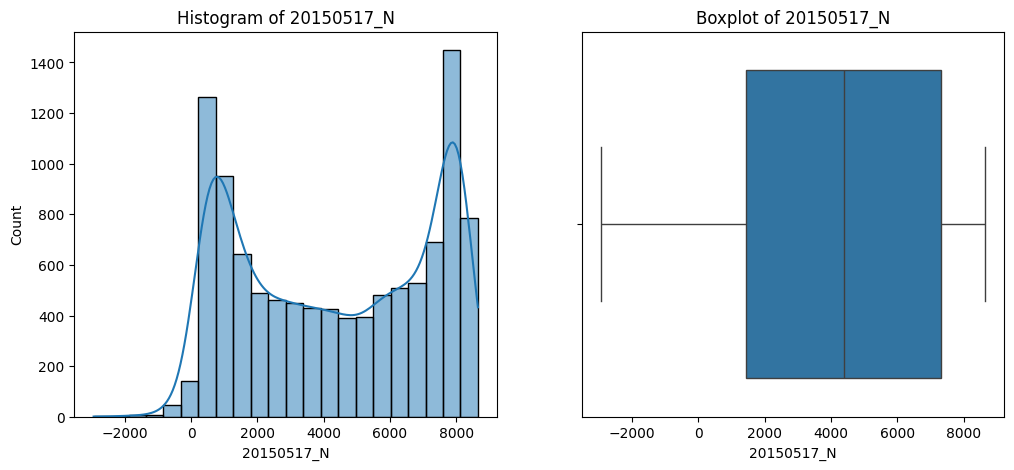

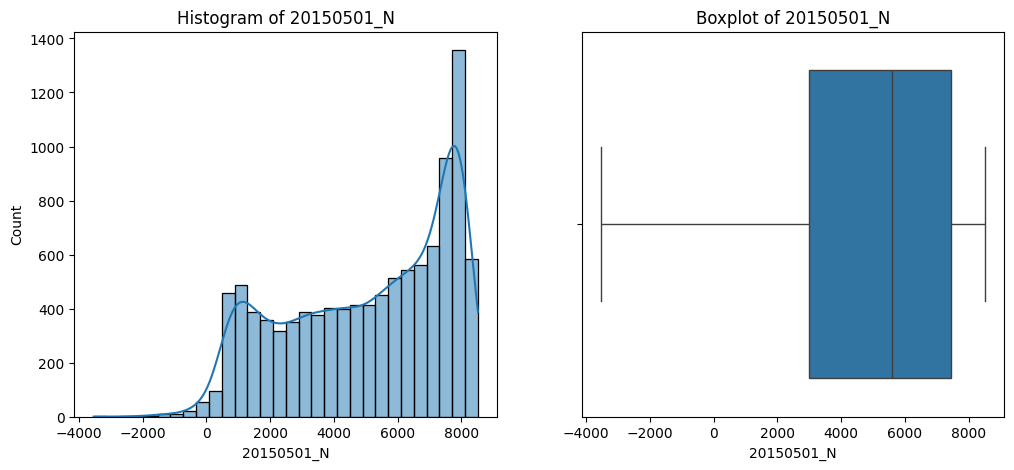

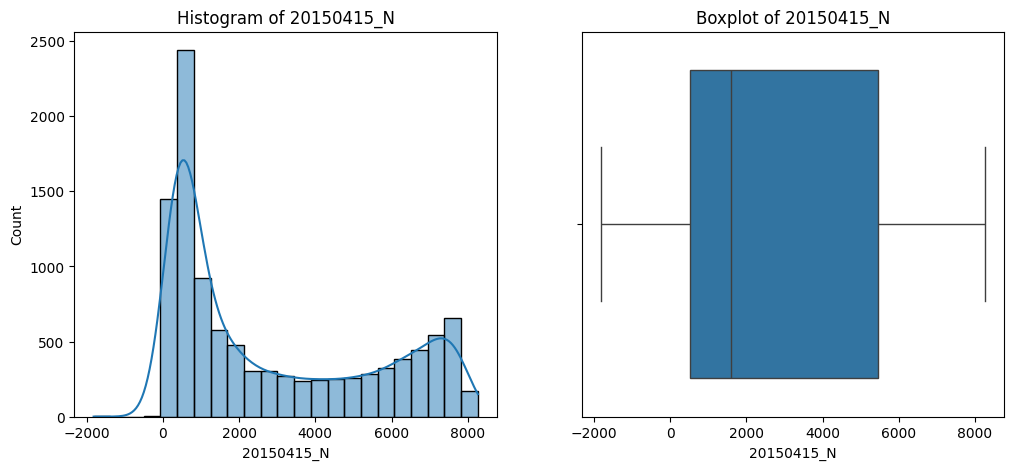

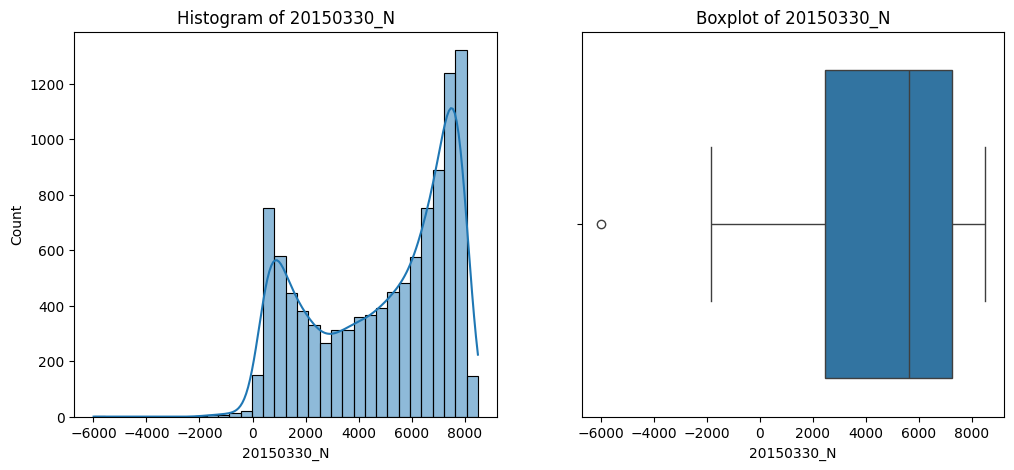

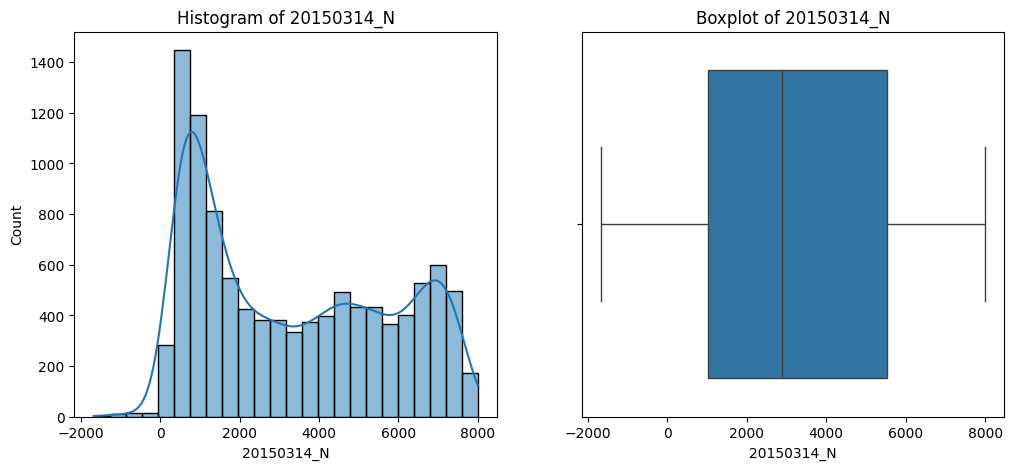

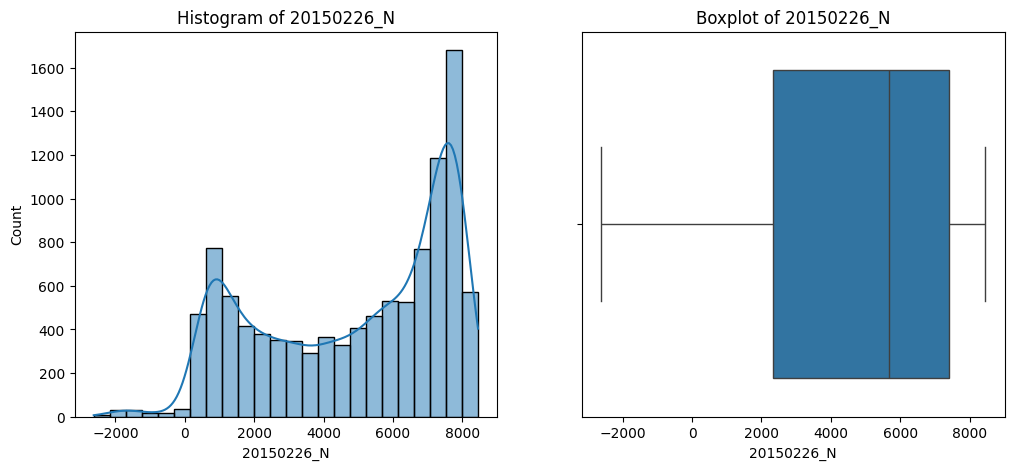

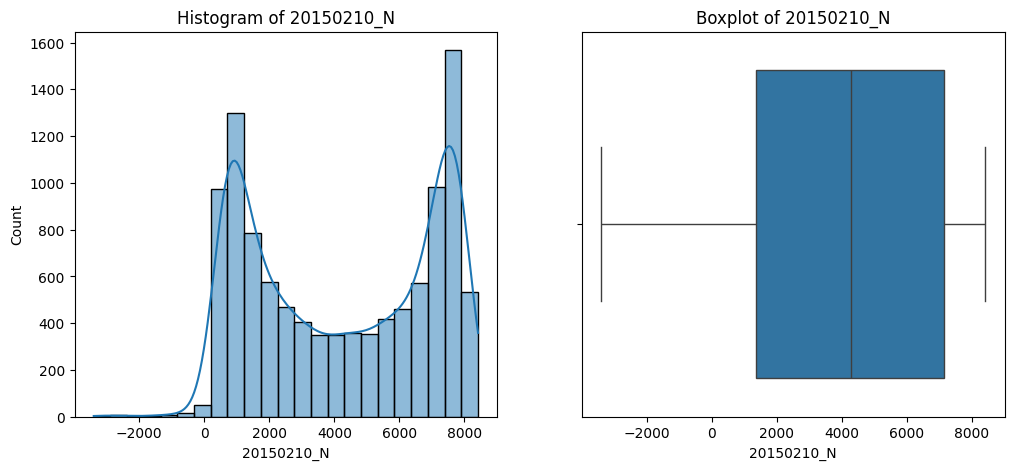

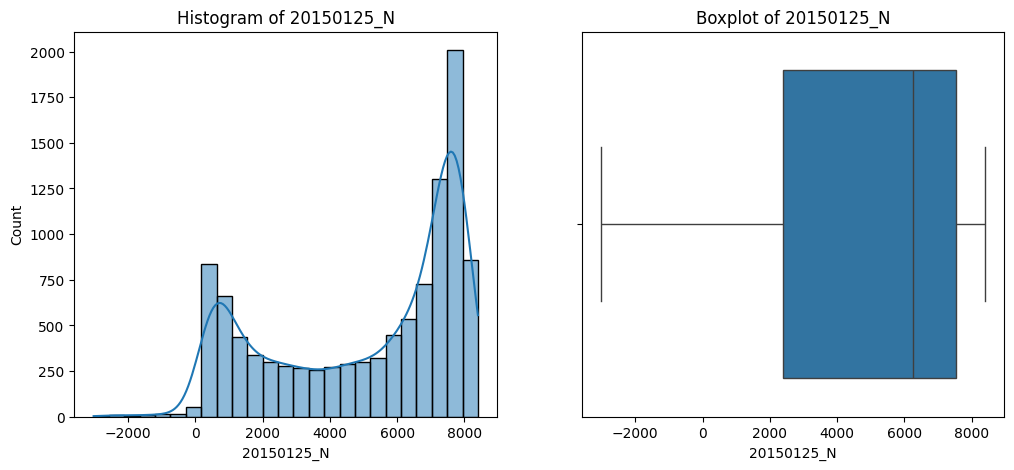

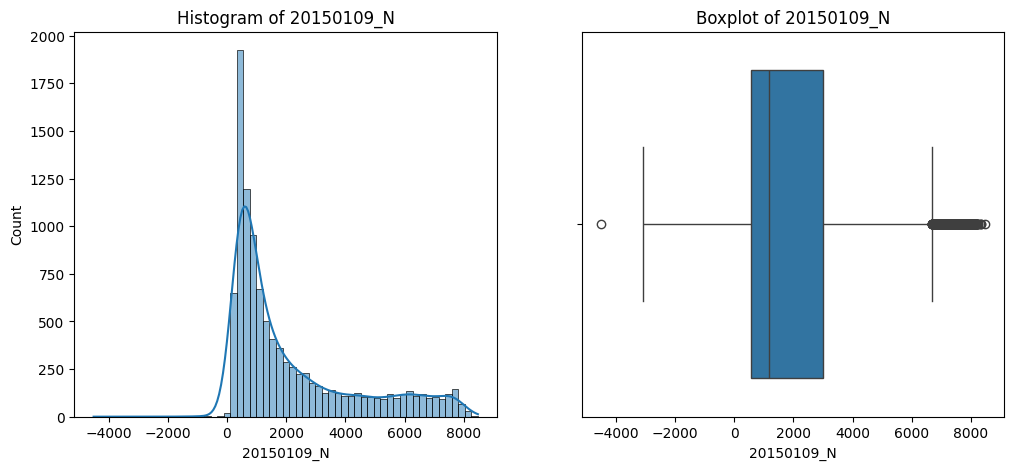

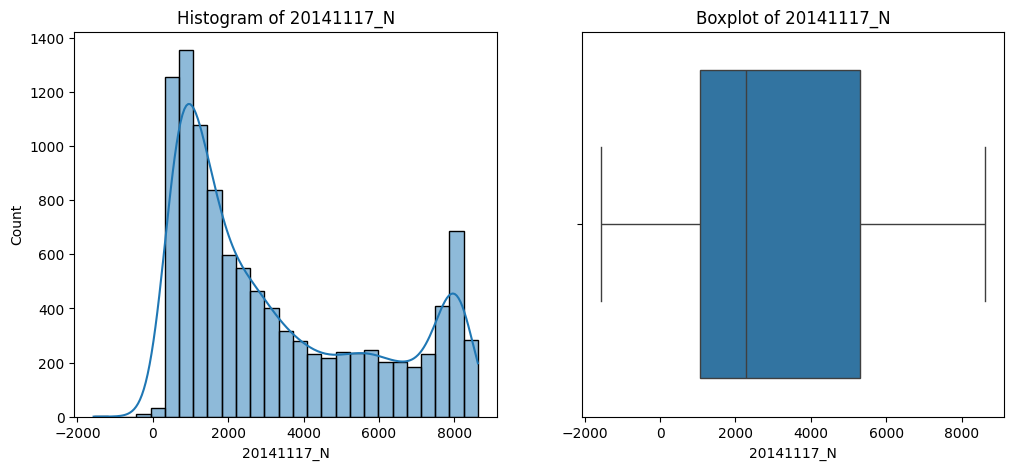

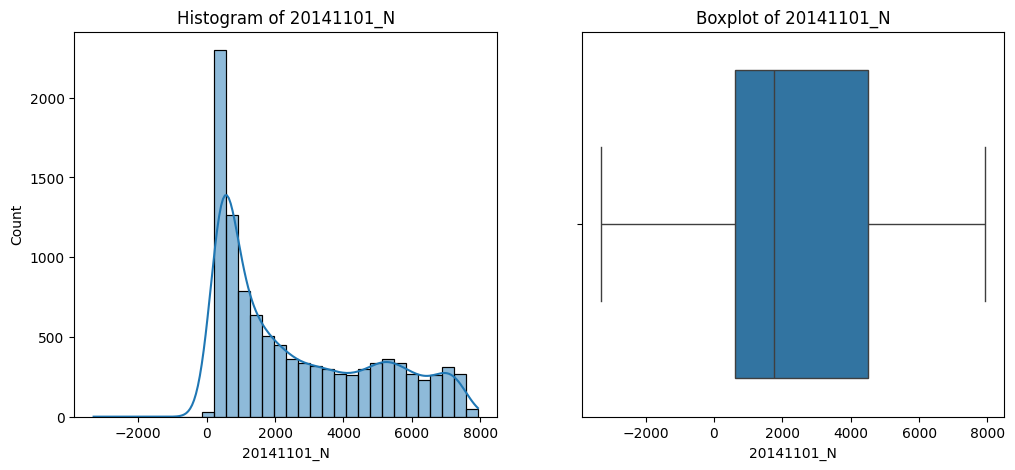

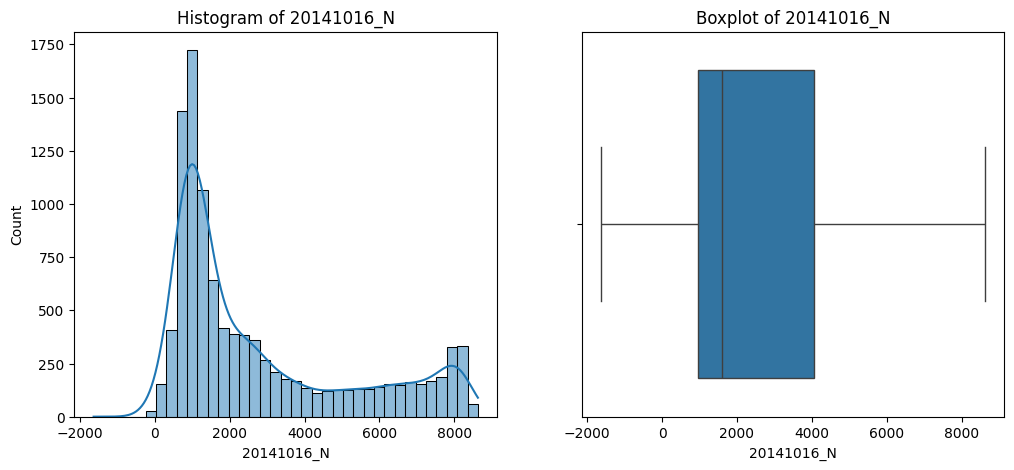

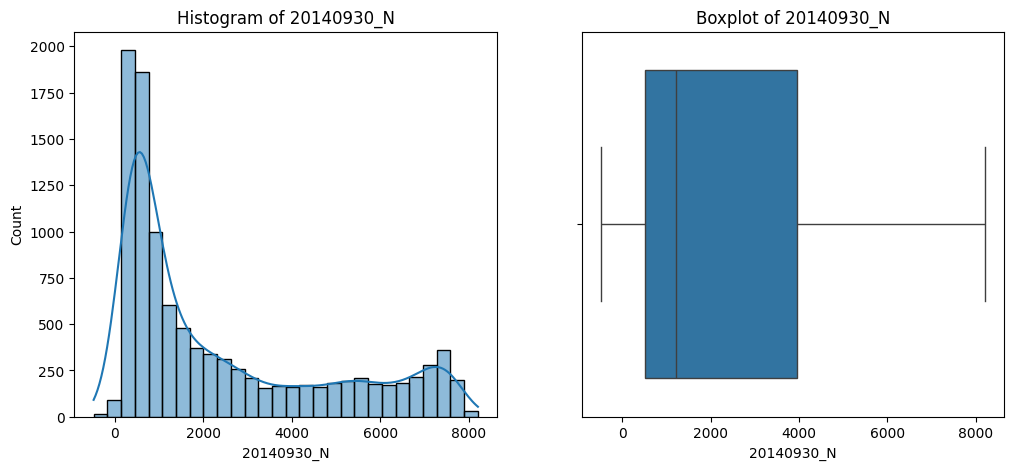

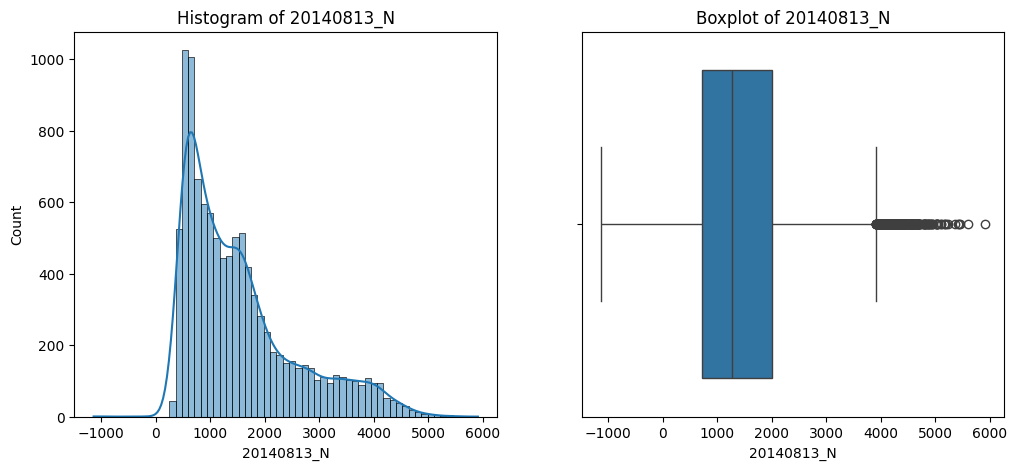

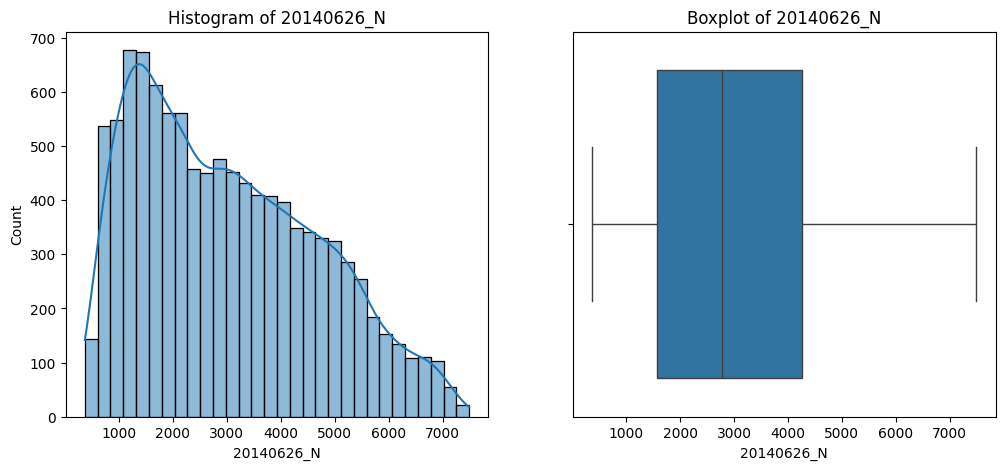

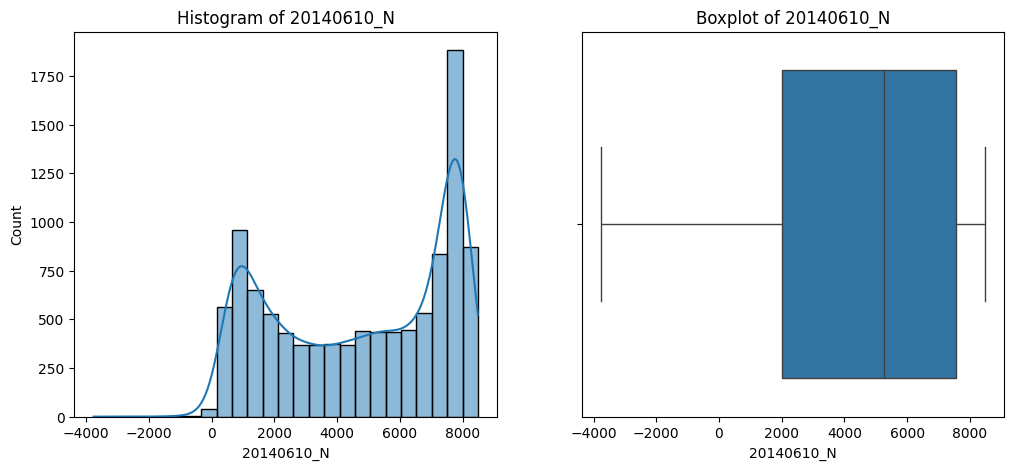

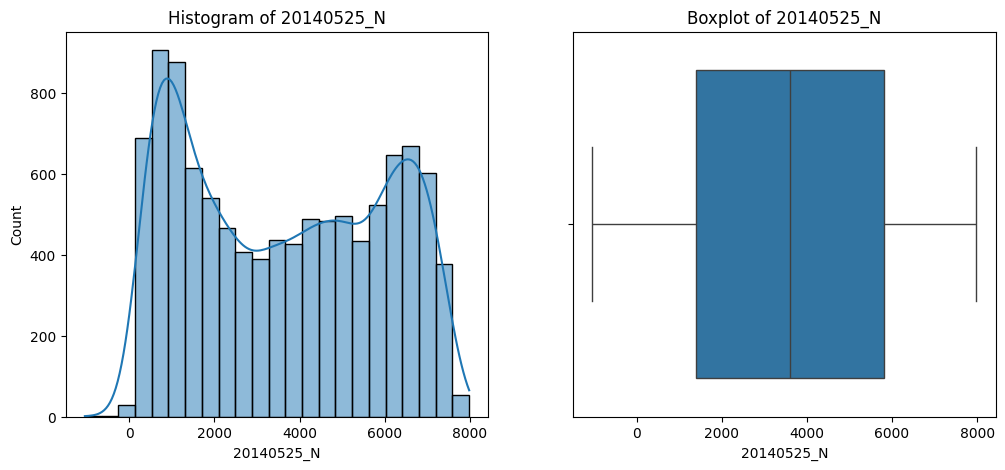

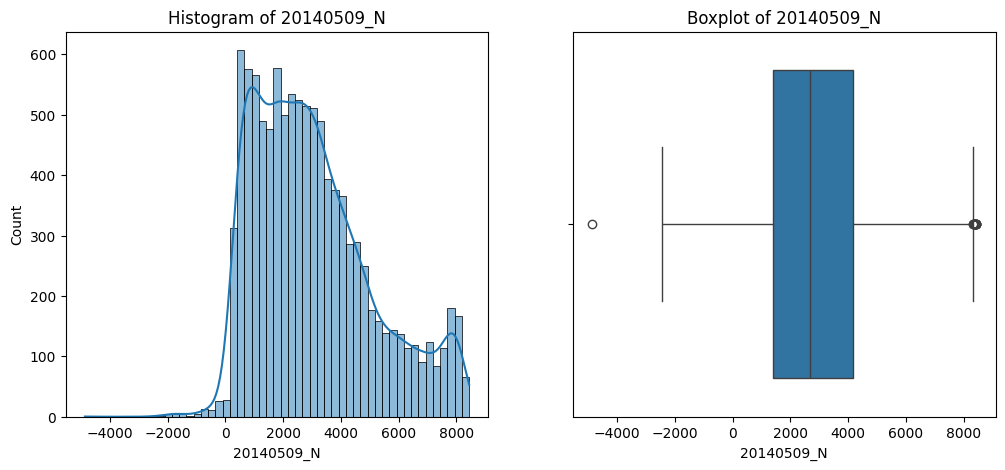

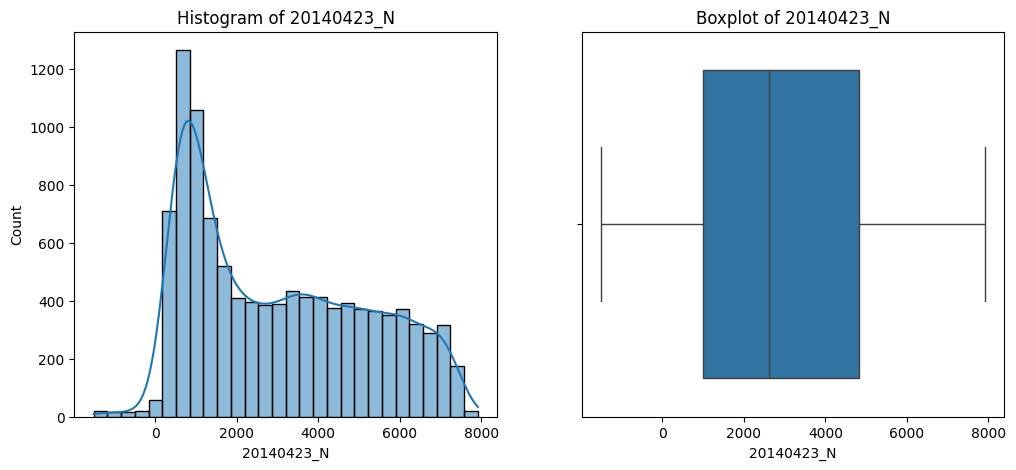

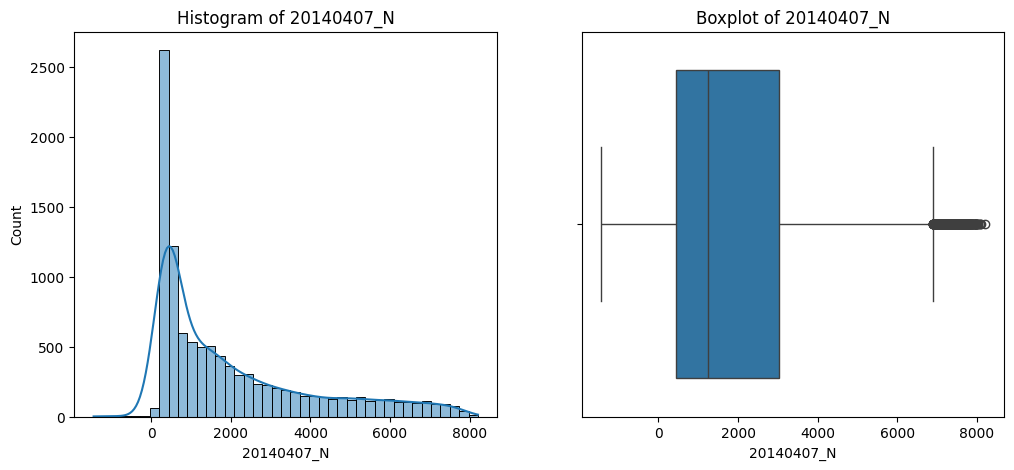

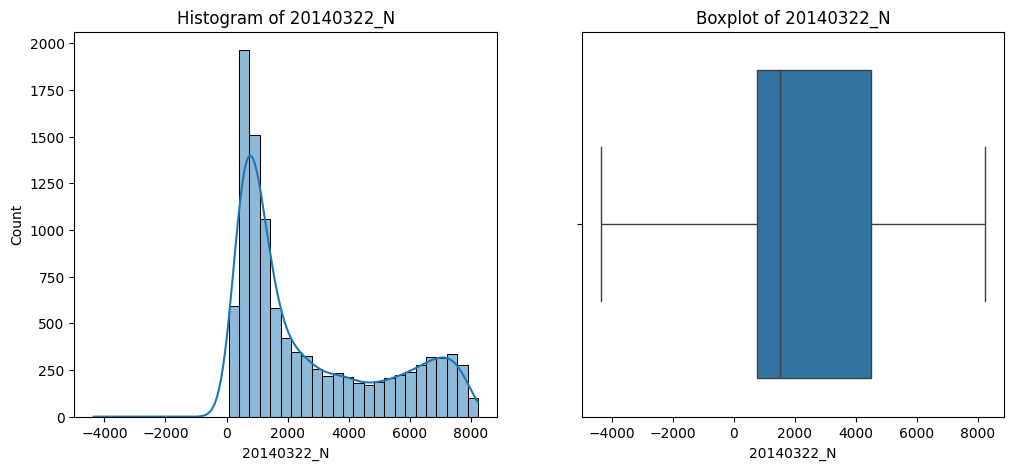

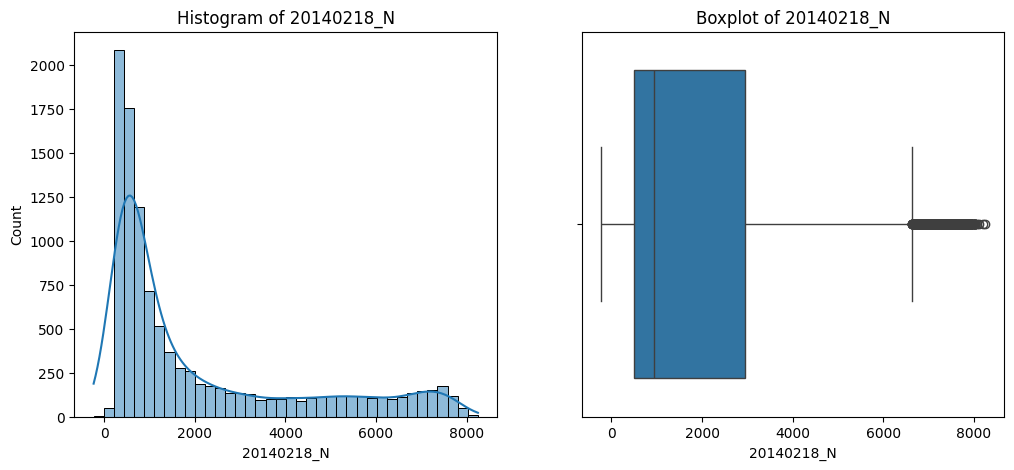

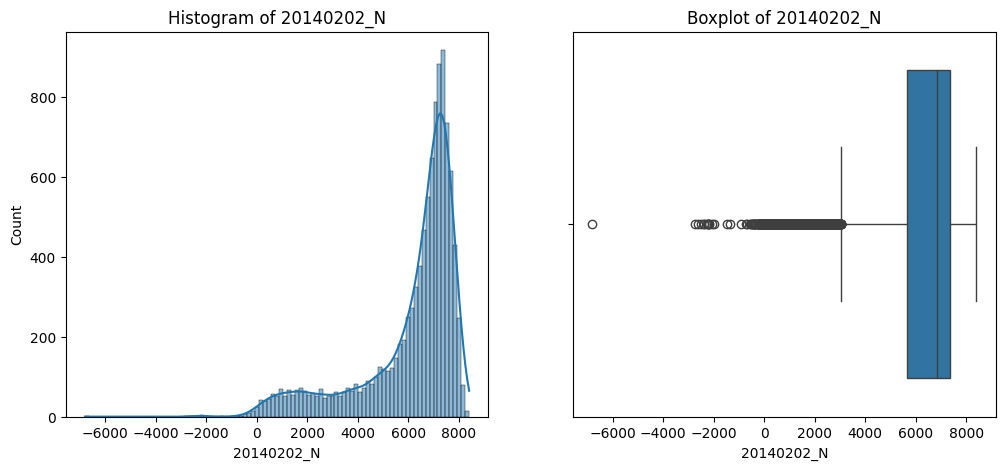

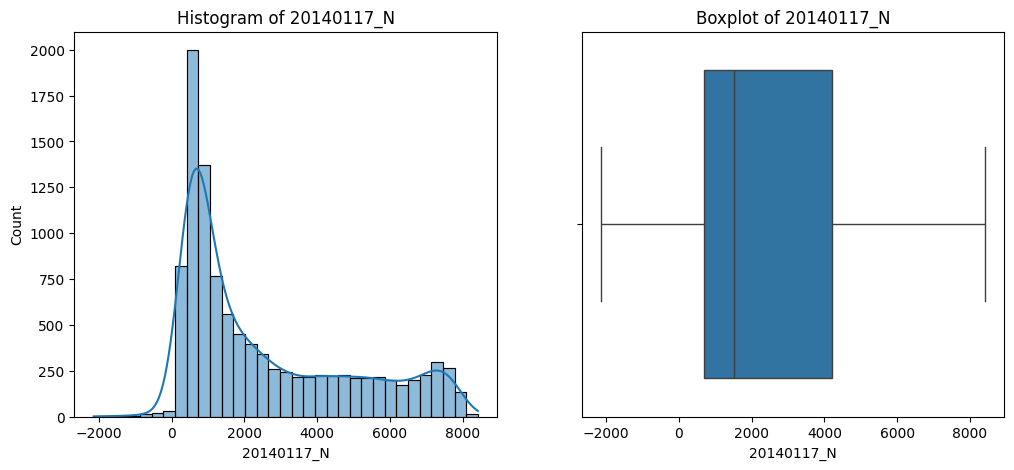

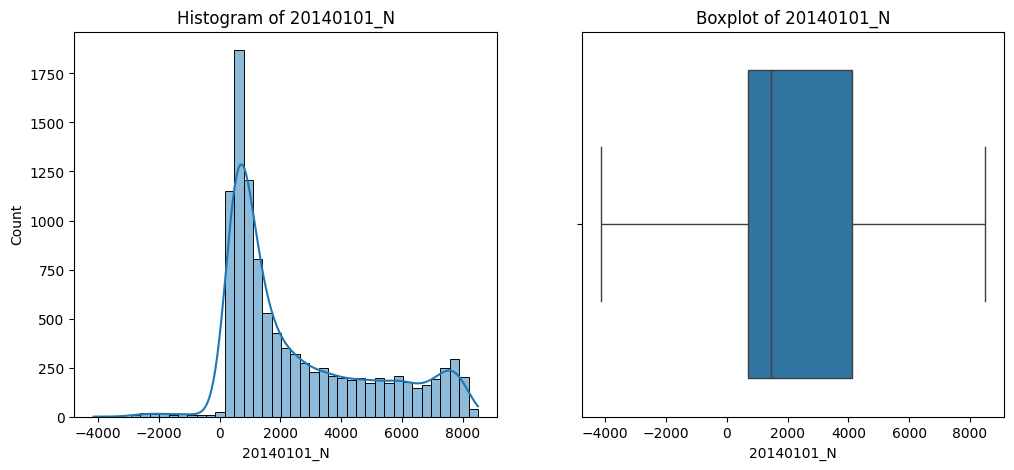

In [ ]:
for column in numeric_col:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

We can understand whether each feature is negatively skewed or positively skewed, and also how many outliers are in these columns.

## **IQR Method**

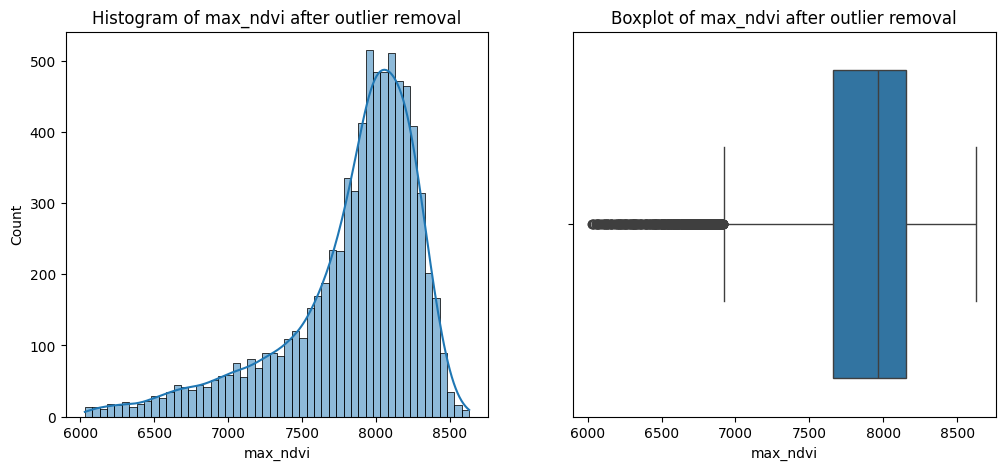

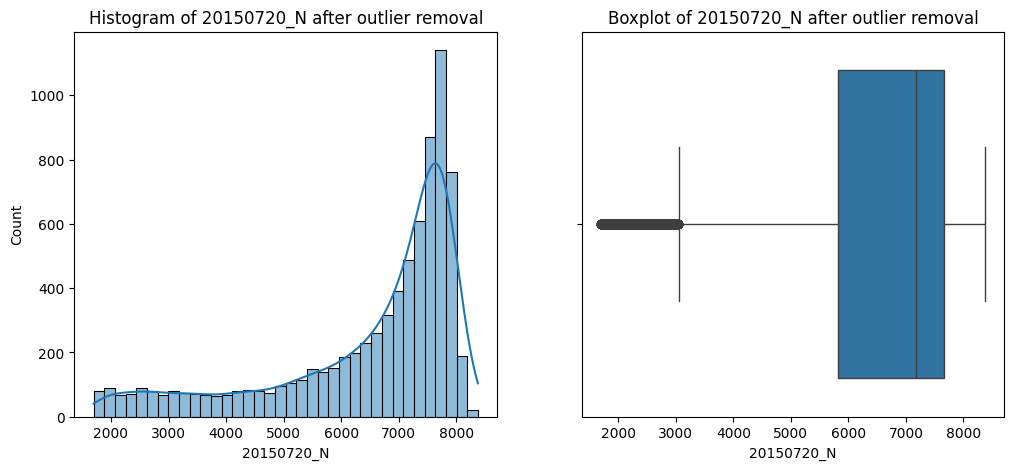

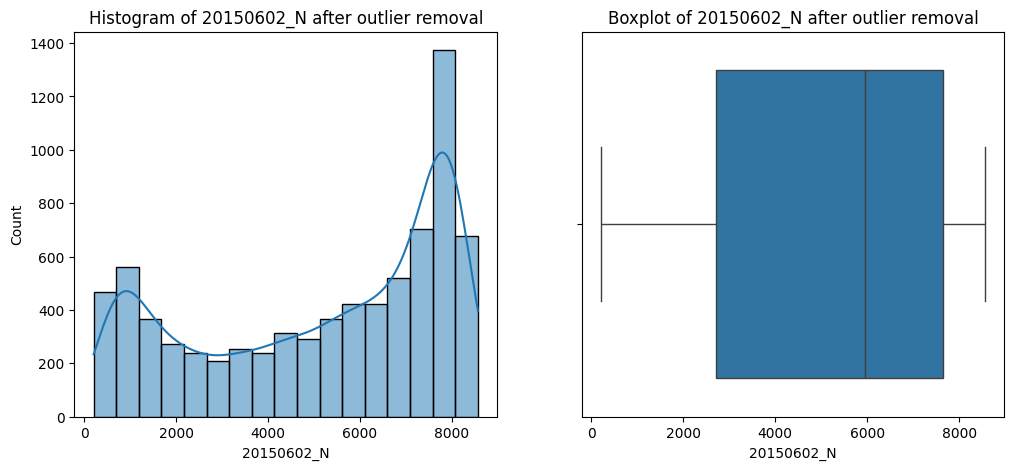

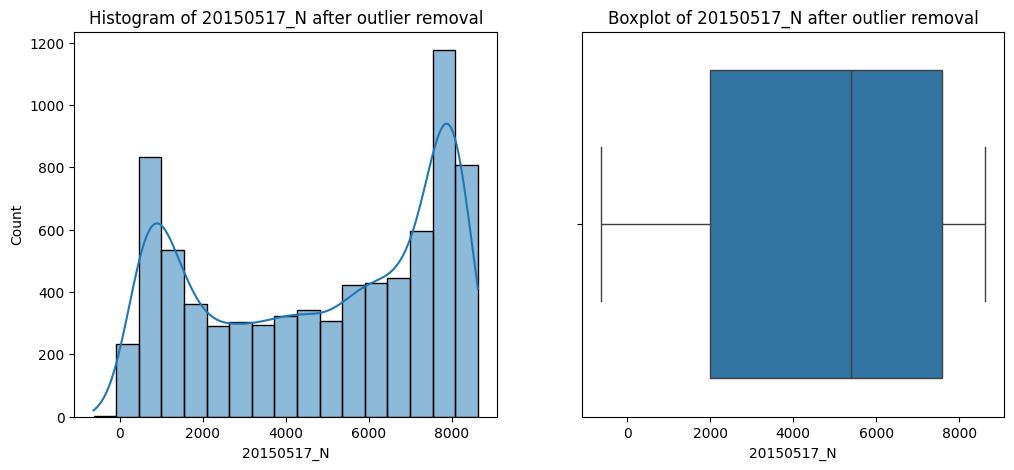

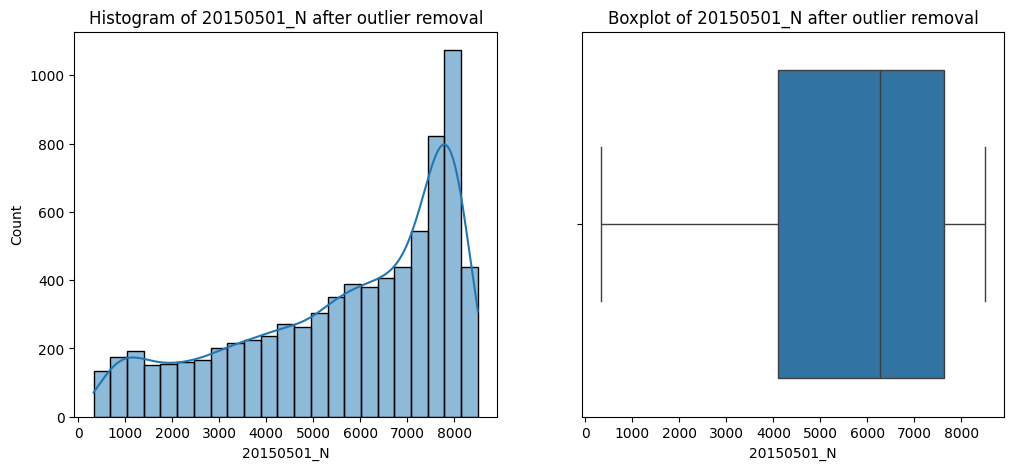

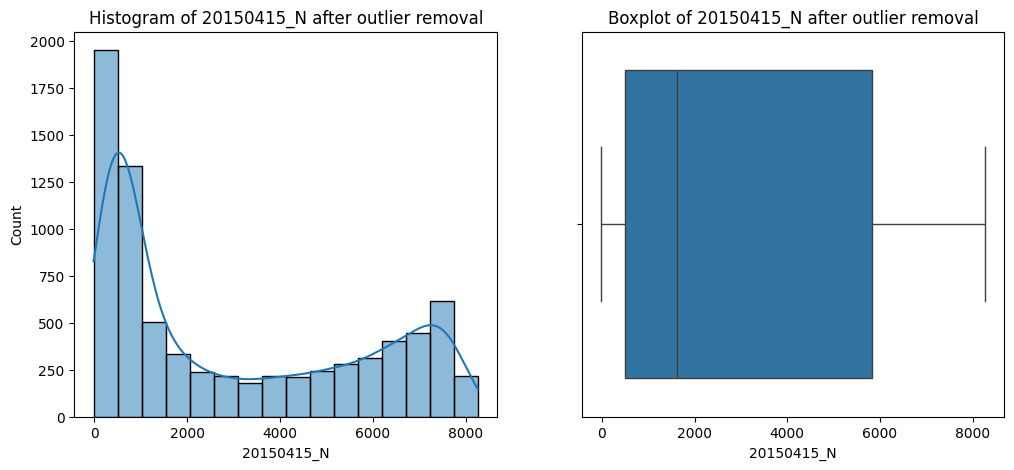

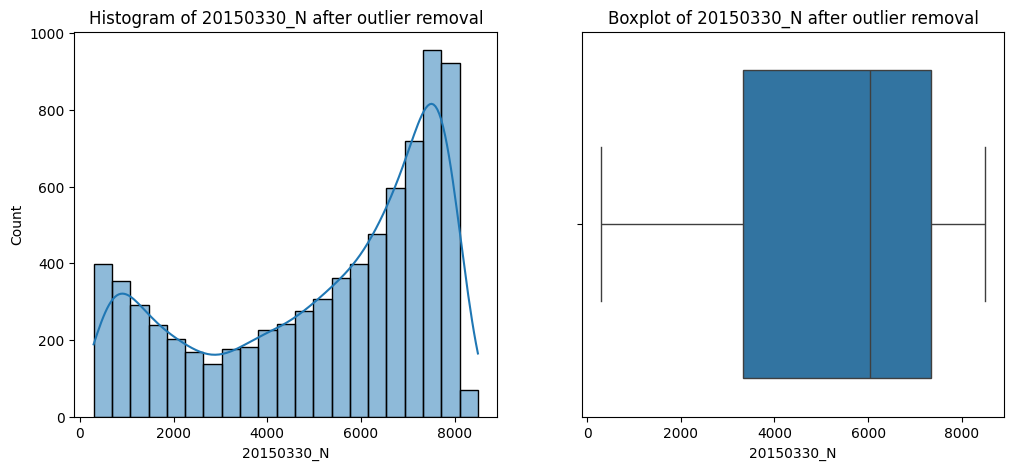

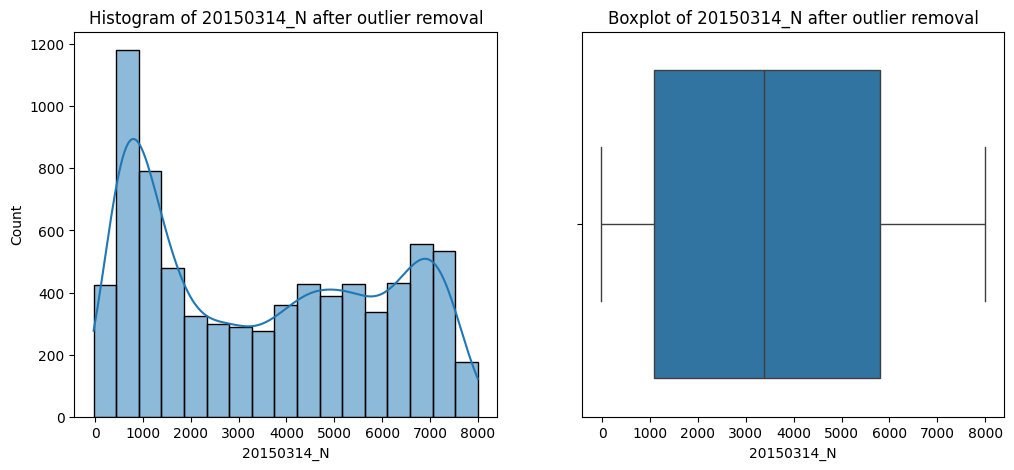

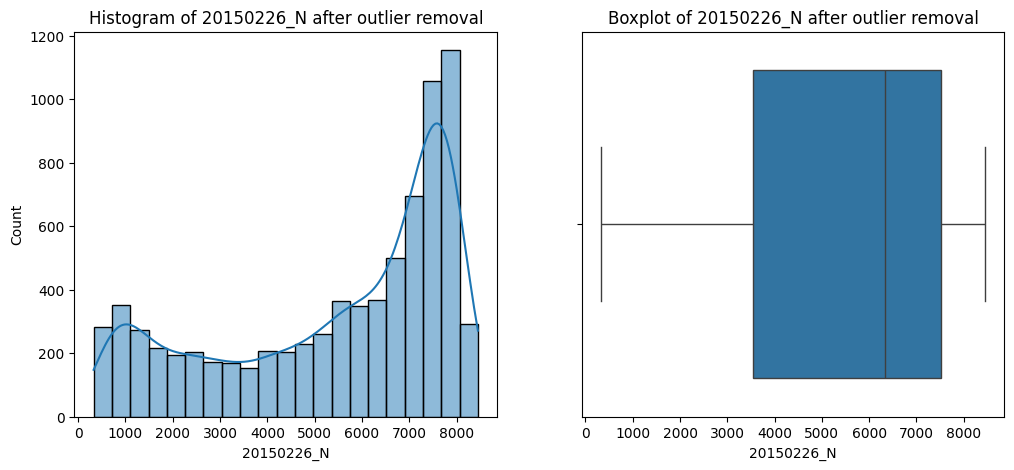

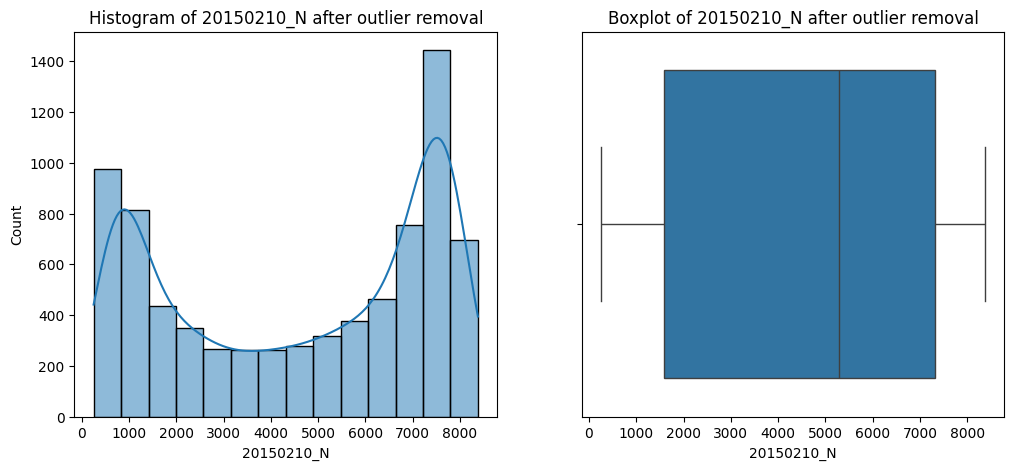

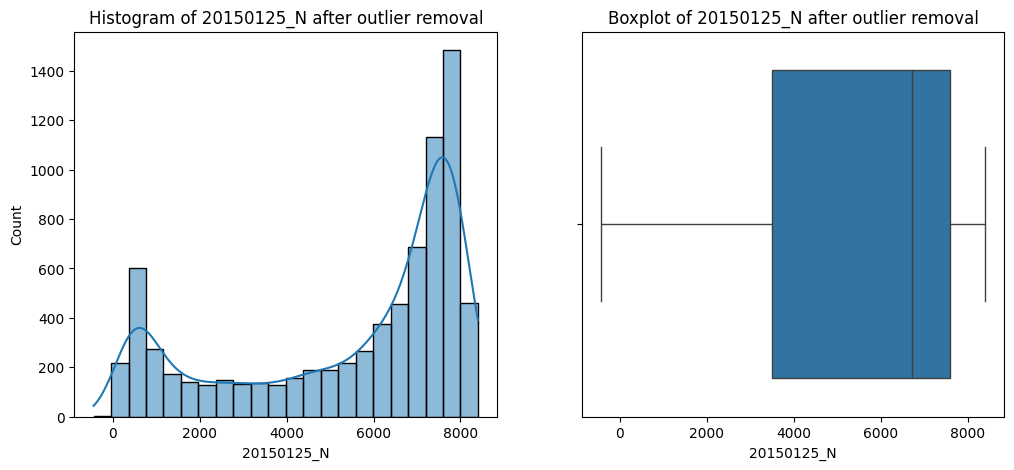

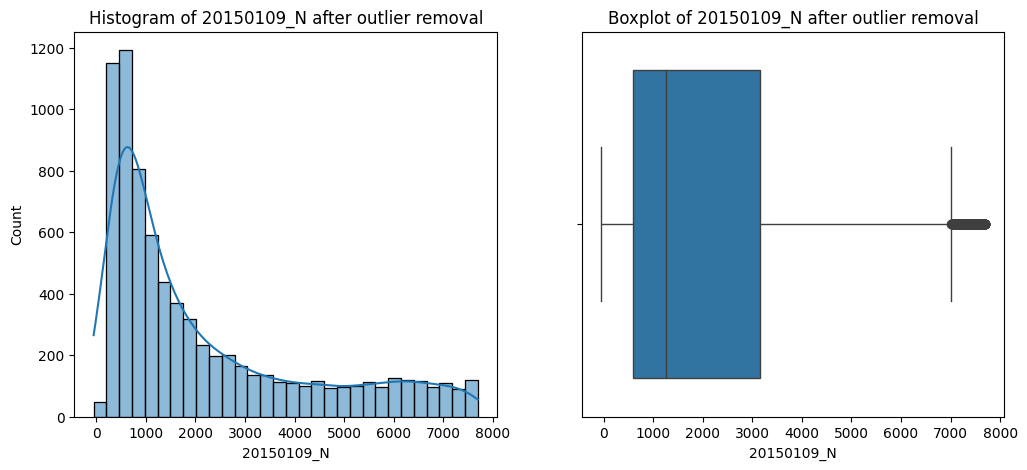

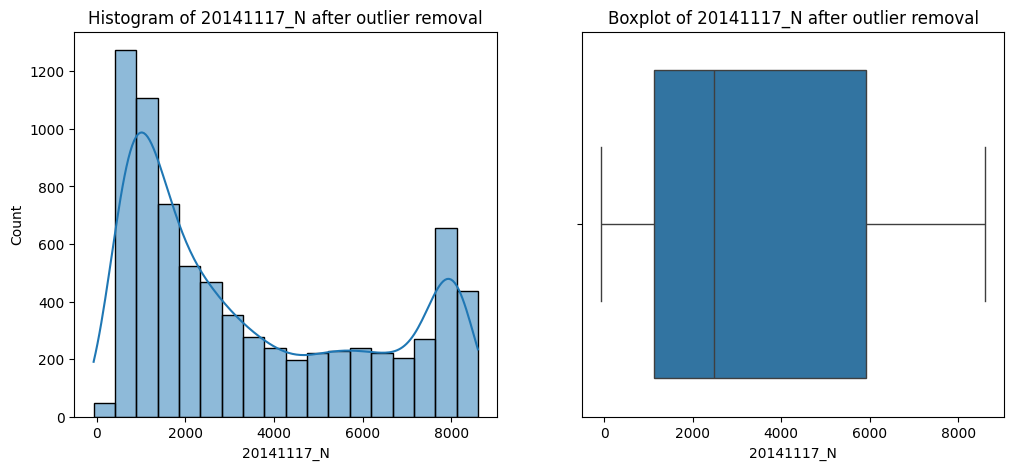

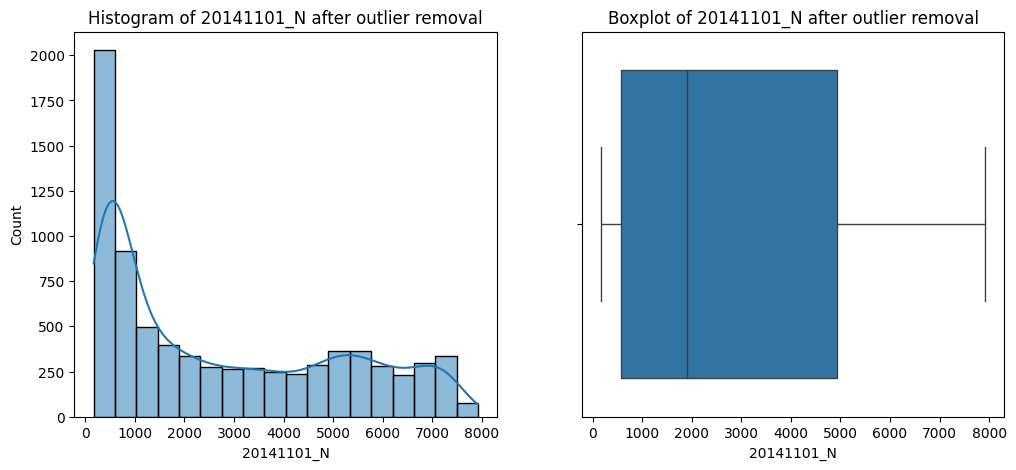

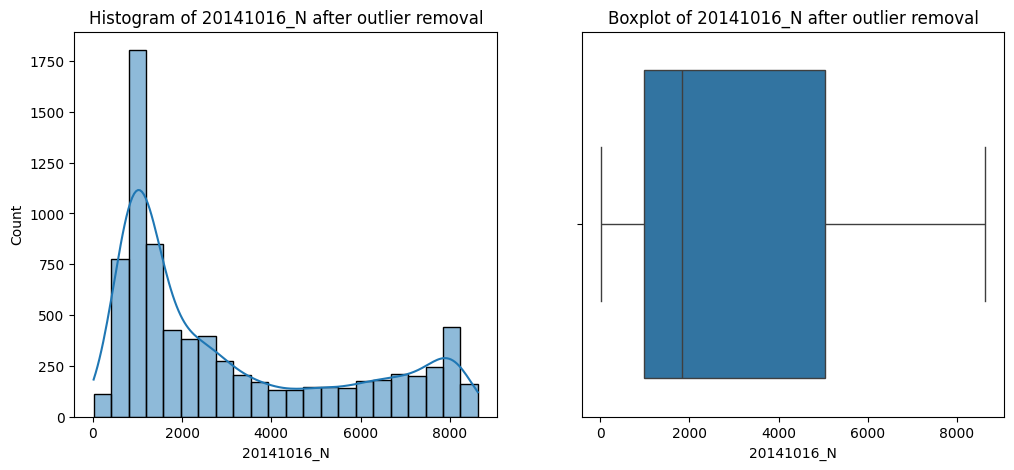

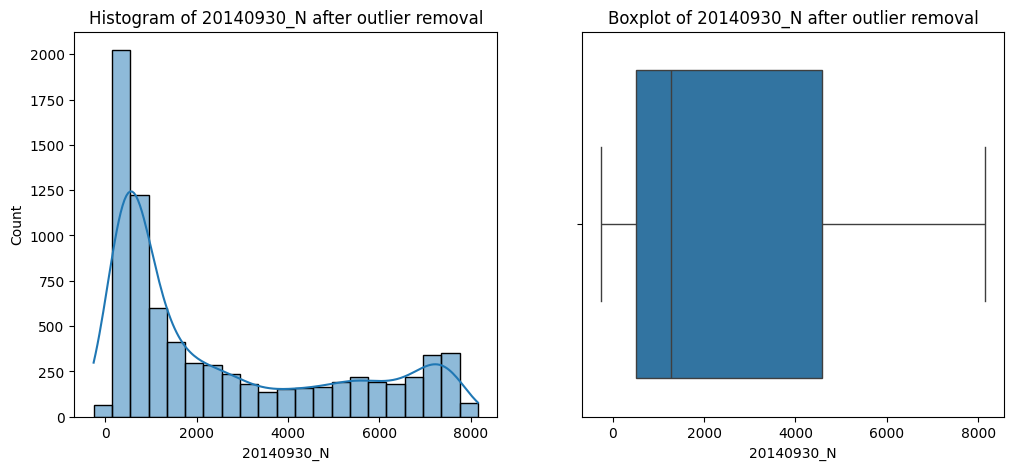

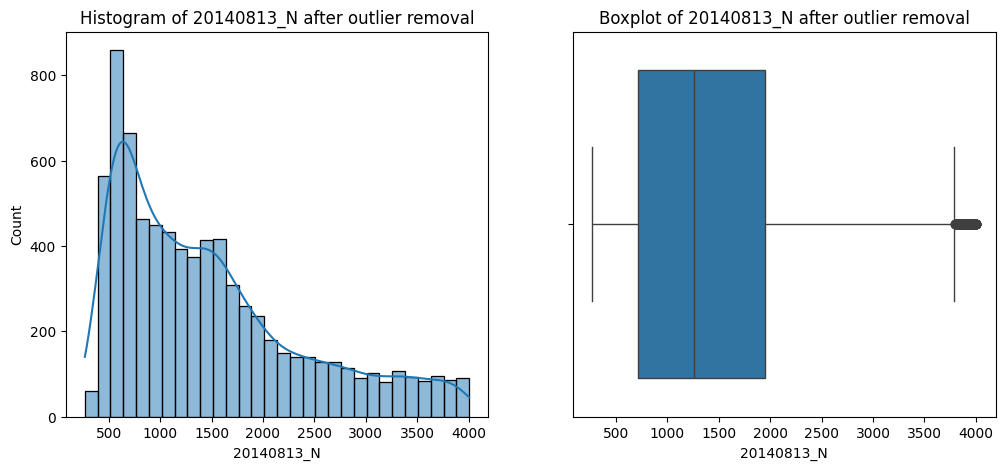

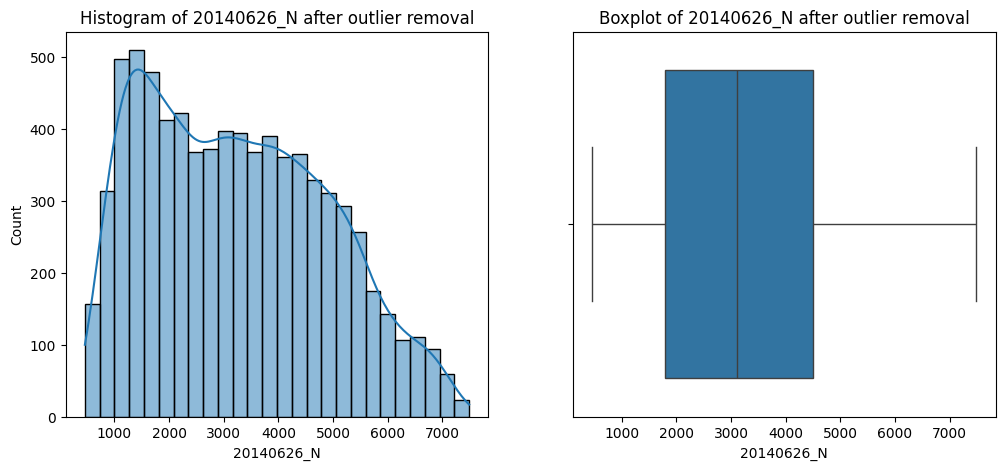

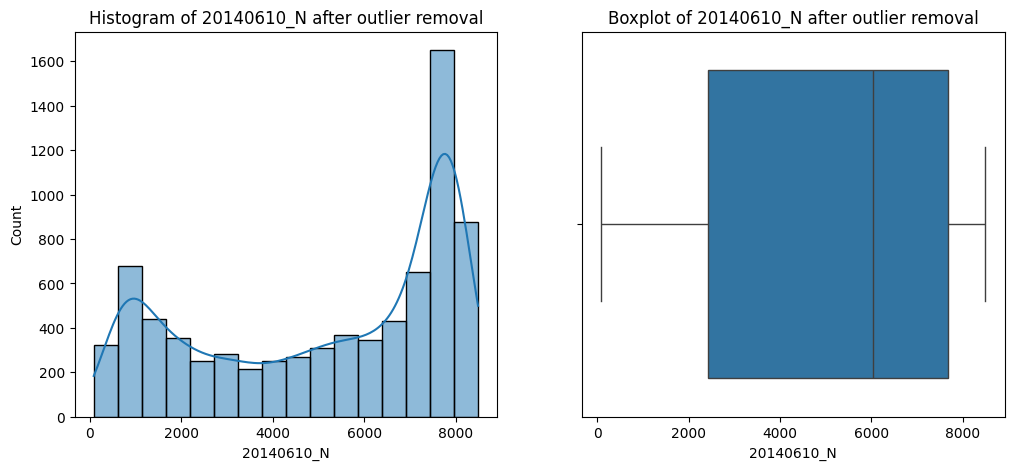

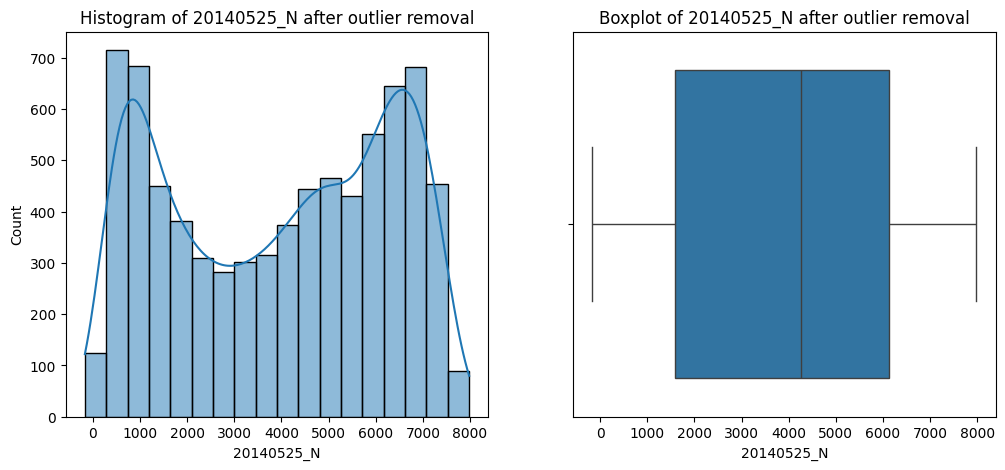

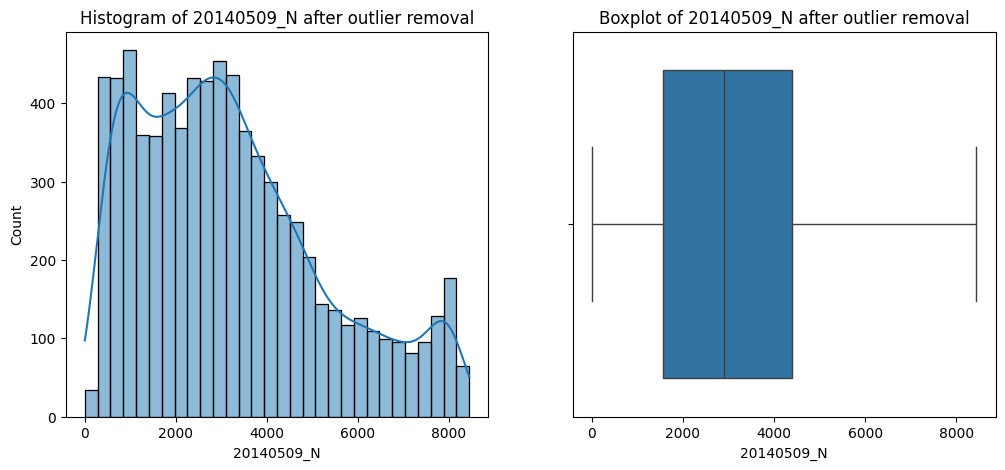

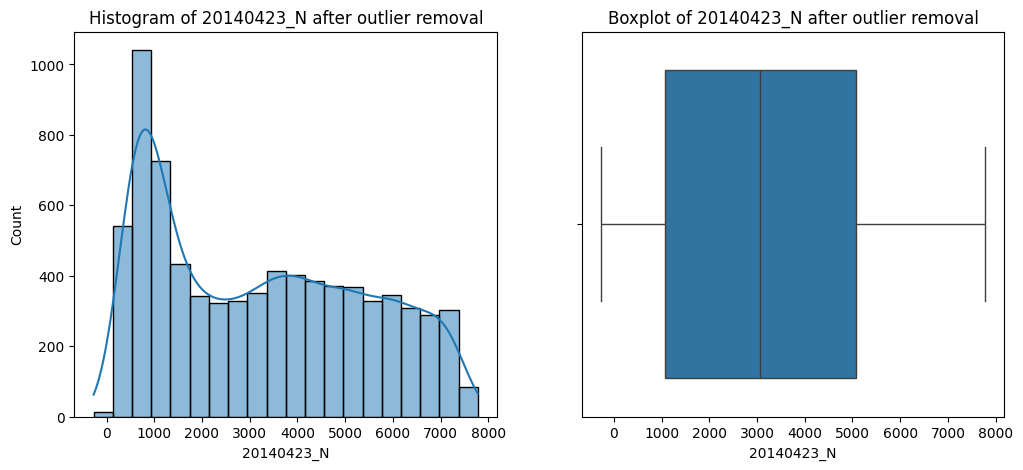

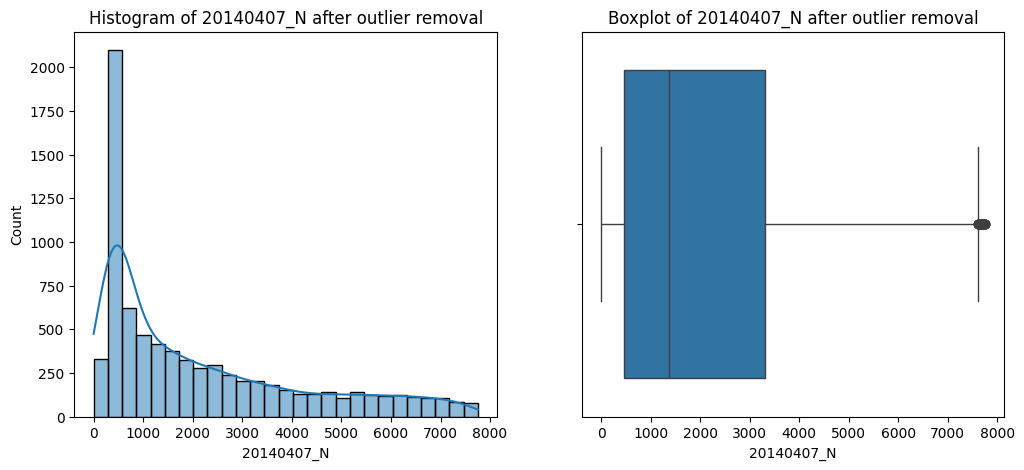

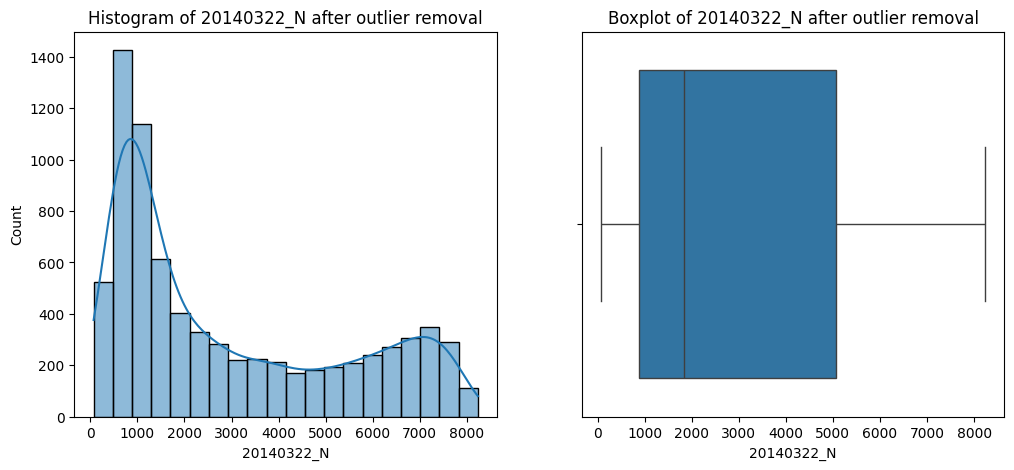

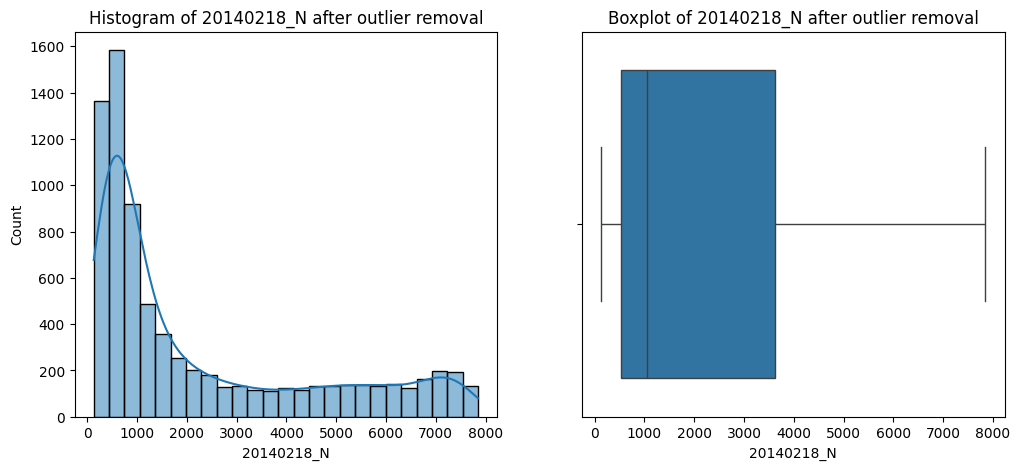

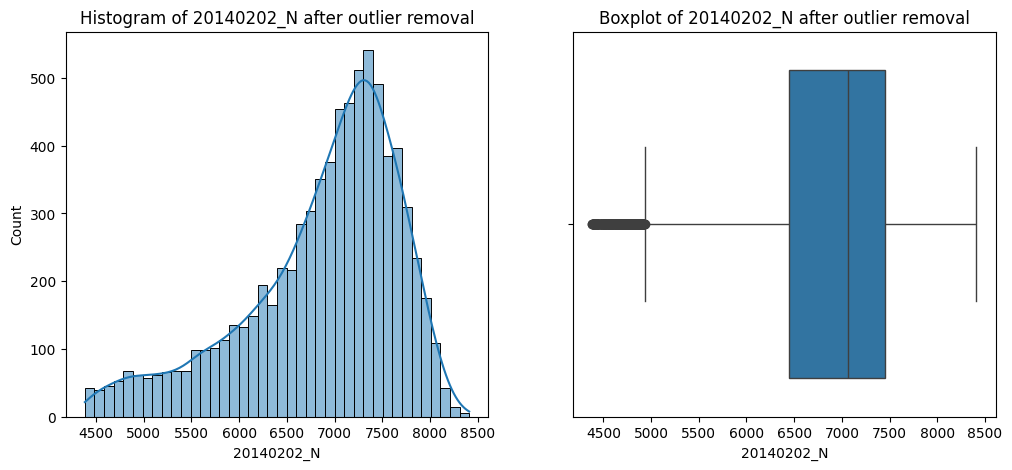

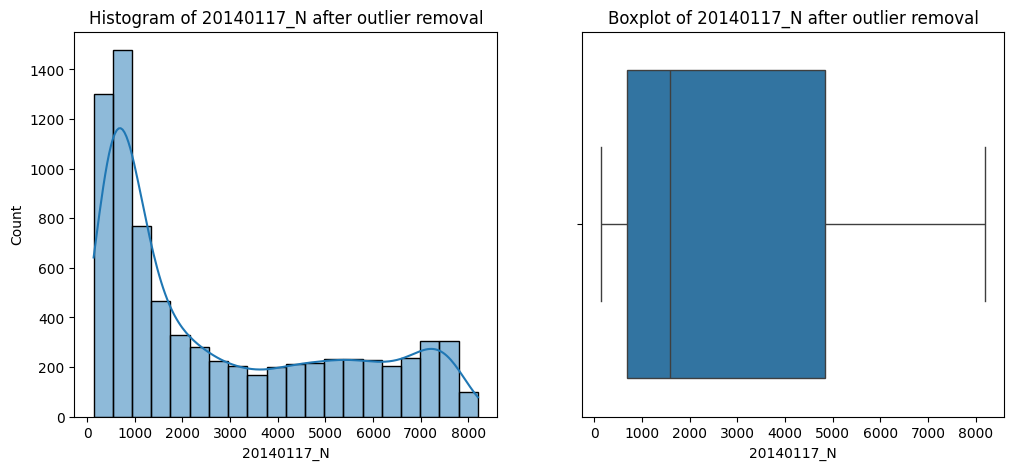

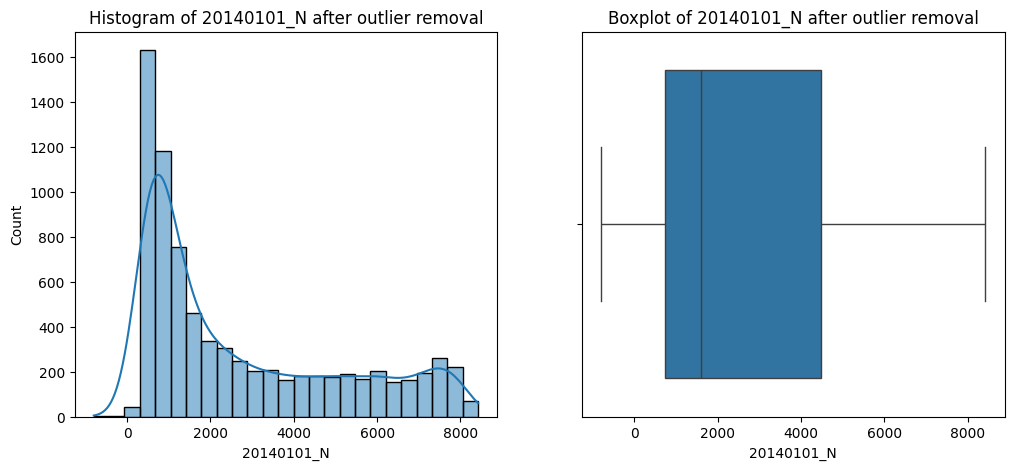

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a filtered DataFrame that excludes outliers
    return data[(data[column] >= lower_bound) &  (data[column] <= upper_bound)]

# Start with the original data
cleaned_data = data.copy()  # Create a copy for cleaning

# Remove outliers for each numeric column
for column in numeric_col:
    cleaned_data = remove_outliers_iqr(cleaned_data, column)

# Visualize the cleaned data again to confirm outliers are removed
for column in numeric_col:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_data[column], kde=True)
    plt.title(f'Histogram of {column} after outlier removal')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_data[column])
    plt.title(f'Boxplot of {column} after outlier removal')

    plt.show()

 This function removes outliers from each column using the Interquartile Range (IQR) method.

In [ ]:
cleaned_data = remove_outliers_iqr(cleaned_data, column)
cleaned_data.shape


(7699, 29)

In [ ]:
sns.pairplot(data=cleaned_data, hue='class', palette='Set2', diag_kind='kde')
plt.show()


Buffered data was truncated after reaching the output size limit.

Pairplots can reveal feature clusters or separability between classes.

In [ ]:
cleaned_data["class"].value_counts()

,count
class,
forest,6256
farm,951
grass,317
impervious,114
orchard,44
water,17


Label Encounder

In [ ]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

 Converts the target column (class) from categorical values to numeric values because most machine learning models work with numbers.

#Exploratory Data Analysis

EDA helps us understand the underlying patterns and relationships between features. It use various plots to explore the data. Correlation Matrix


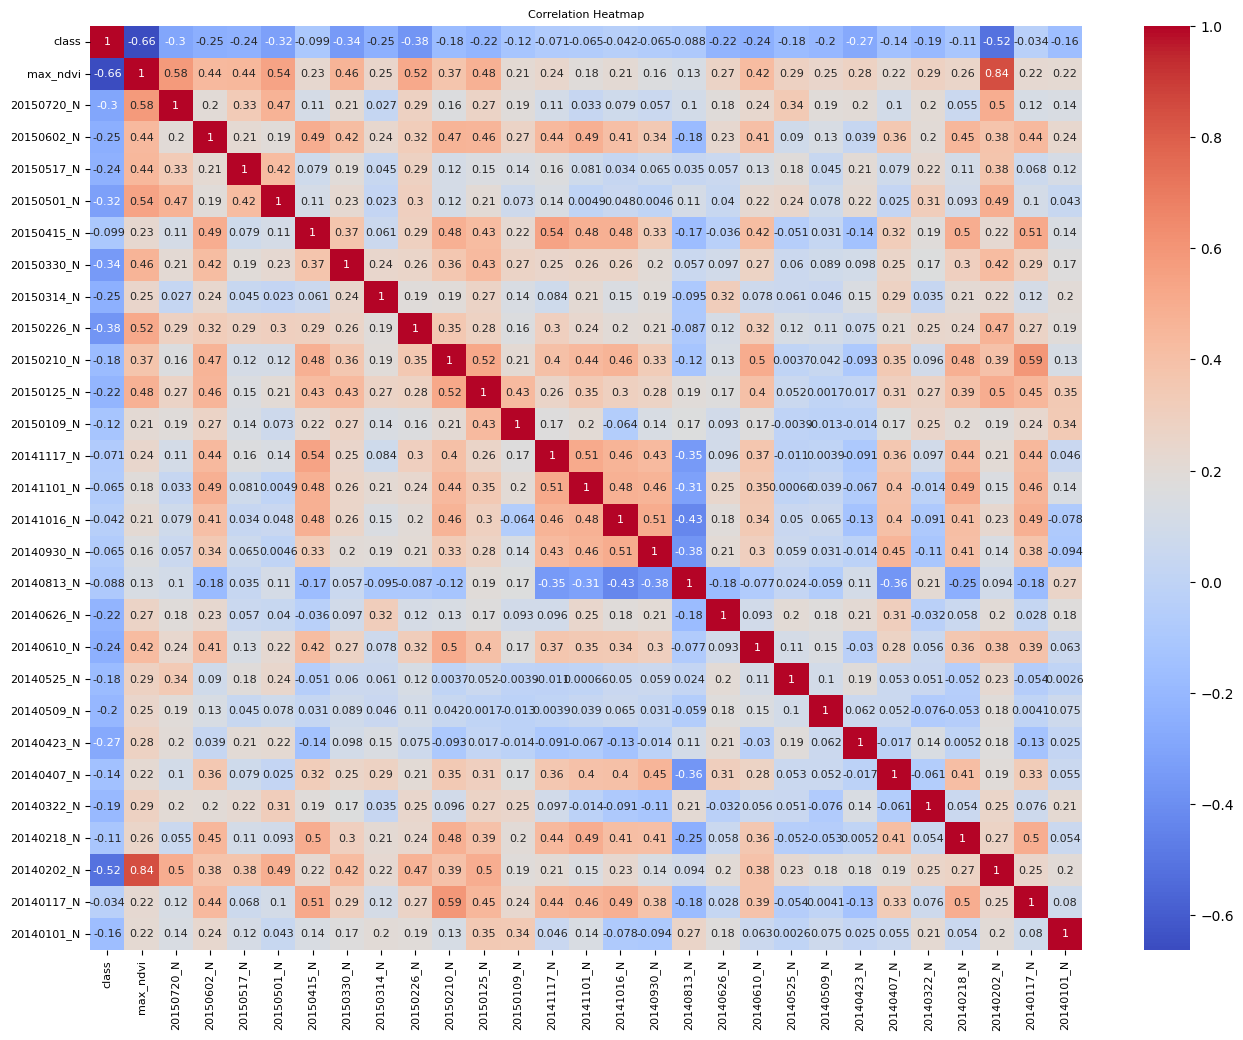

In [ ]:


# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(16, 12))  # Adjust the width and height as needed

# Calculate correlation and plot the heatmap
# Increase annotation font size for better visibility
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap', fontsize=8)  # Increase title font size
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

 Understanding feature correlations can highlight redundancy, guiding feature selection and engineering efforts.
 High correlation values (close to 1 or -1) between features suggest redundancy, potentially leading to multicollinearity issues in regression models.

 Correlation Strength: The color of each cell indicates the strength of the correlation between two dates. Dark red means a strong positive correlation, dark blue means a strong negative correlation, and white means no correlation.red cells indicate periods where data points are highly positively correlated, while blue areas show negative correlations.
 numbers showing the exact correlation coefficient, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).

Split And Train Data

In [ ]:
# split and train the dataset
x=data.drop(['class'],axis=1)
y=data['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Splits the data into training (80%) and testing (20%) sets. The test set helps evaluate how well the model generalizes to new data.

Standard Scaler

In [ ]:
#Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


 Scales the features to have a mean of 0 and a standard deviation of 1, which is essential for many machine learning algorithms.

# Balancining target values

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))


Original class distribution: Counter({1: 5963, 0: 1151, 3: 762, 2: 349, 5: 166, 4: 44})
Resampled class distribution: Counter({2: 5963, 1: 5963, 0: 5963, 3: 5963, 5: 5963, 4: 5963})


SMOTE oversamples the minority class to balance the data and improve model performance on underrepresented classes.


In [ ]:
y_train_resampled.value_counts()

,count
class,
2,5963
1,5963
0,5963
3,5963
5,5963
4,5963


In [ ]:
# Convert the resampled data back to a DataFrame
X_resampled_data = pd.DataFrame(X_train_resampled, columns=x.columns)
y_resampled_data = pd.DataFrame(y_train_resampled, columns=['class'])

In [ ]:
#  combine the resampled features and target back into a single DataFrame
data_resampled = pd.concat([pd.DataFrame(X_train_resampled), pd.DataFrame(y_train_resampled)], axis=1)

In [ ]:
data_resampled

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,class
0,0.249821,0.637522,1.059854,-0.337967,0.209398,1.435830,0.755363,0.672208,0.807828,1.186924,...,1.023787,1.451201,1.115524,-0.391417,-0.396988,-0.383154,0.576650,0.501654,1.261355,2
1,0.310919,0.674003,-1.510241,1.193953,0.349285,-0.951313,0.104863,0.771899,0.893626,-1.176186,...,-1.243697,0.600311,1.809878,-0.829638,0.612962,-0.676784,0.277794,-0.760834,1.354466,1
2,0.314468,-1.977882,-0.583127,-0.374866,-1.403589,-0.741747,-1.079513,1.637811,1.069386,0.674780,...,-0.949018,-1.207318,0.660725,-0.821264,-0.872110,0.757168,0.347126,-0.289195,0.782505,1
3,0.677919,-1.835944,-0.631757,1.397900,-1.072204,-0.841440,1.197040,-0.346667,0.399513,-0.316681,...,0.725816,-1.225918,1.847998,-0.659998,-0.465744,-0.678419,0.569108,-0.089994,-0.438420,1
4,0.269162,0.876125,0.899585,0.934870,0.729168,0.006203,0.890019,1.426971,0.316379,1.227401,...,0.790934,2.180036,-0.875655,1.241527,1.958424,-0.353766,0.828010,1.179283,0.245888,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35773,-2.949015,-1.606229,-1.679232,-1.668567,-1.075699,-0.885802,-2.087807,-1.224455,-2.391794,-2.069470,...,-1.263753,-1.244755,-1.288618,-0.816545,-0.564225,-0.773903,-1.909751,-0.748748,-0.948398,5
35774,-3.489461,-1.953911,-1.708405,-1.631925,-1.796567,-0.927376,-1.769513,-1.192571,-2.463489,-1.359678,...,-1.423185,-2.315147,-2.041997,-0.561962,-0.843439,-0.678933,-3.251171,-1.107097,-1.726171,5
35775,-2.898010,-1.457842,-1.761578,-0.994944,-1.890282,-0.920842,-1.671919,-1.295365,-1.870994,-0.990702,...,-0.839705,-1.581978,-1.419881,-0.375154,-0.475632,-0.780225,-2.590387,-0.587768,-0.869352,5
35776,-2.689167,-1.322050,-1.265060,-0.931554,-1.006423,-0.921092,-1.701628,-0.870206,-0.845039,-0.975041,...,-0.437562,-0.308914,-0.194096,-0.050459,-0.803121,-0.719525,-2.316737,-0.137339,-0.258684,5


In [ ]:
#'data_resampled' contains your features (X) and target (y)
X = data_resampled.drop('class', axis=1)  # Features, excluding the 'class' column
y = data_resampled['class']  # Target variable, the 'class' column


# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (28622, 28)
X_test shape: (7156, 28)
y_train shape: (28622,)
y_test shape: (7156,)


##pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))  # Random Forest
])

In [ ]:
std = StandardScaler()

# Fit and transform the training data
X_train_transformed = std.fit_transform(X_train)

# Transform the testing data
X_test_transformed = std.fit_transform(X_test)


# Model Training and Evaluation

*  Decision Tree Classifier
*  Logistic Regression
*  Support Vector Machine (SVM)
*  KNeighborsClassifier
*  Random Forest Classifier









# Decision Tree Classifier

In [ ]:
#Initialize Model of DecisionTreeClassifier & fit model
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=42)
clf.fit(X_train_transformed,y_train)

# Predict on Training Data
y_pred = clf.predict(X_test_transformed)

# Calculate Training Accuracy Scores
dtc_train_accuracy=accuracy_score(y_test,y_pred)
print(f"Training Accuracy Score: {dtc_train_accuracy:.2f}")

#Predict and Calculate Accuracy Scores
dtc_test_accuracy=accuracy_score(y_test,y_pred)
print(f"Decision Tree Test Accuracy: {dtc_test_accuracy:.2f}")


Training Accuracy Score: 0.92
Decision Tree Test Accuracy: 0.92


 A Decision Tree model is trained with specific hyperparameters like max_depth, min_samples_split, and min_samples_leaf to control overfitting.

# Logistic Regression

In [ ]:

# Initialize Models of Logistic Regression & fit model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on Training Data
log_reg_train_pred = log_reg.predict(X_train,)

# Calculate Training Accuracy Scores
log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_pred)
print("Training Accuracy Score: ",log_reg_train_accuracy)

# store the training accuracy to use in the visualization later
train_accuracy = log_reg_train_accuracy

#Predict and Calculate Accuracy Scores
log_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_pred)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")

# store the testing accuracy to use in the visualization later
test_accuracy = log_reg_accuracy

Training Accuracy Score:  0.867654251974006
Logistic Regression Accuracy: 0.86


In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_train_pred = svm_model.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_pred)
print(f"SVM Training Accuracy: {svm_train_accuracy:.2f}")

svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")


SVM Training Accuracy: 0.99
SVM Accuracy: 0.98


# KNeighborsClassifier





In [ ]:

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict on training data
knn_train_pred = knn.predict(X_train)

# Calculate training accuracy
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
print("KNN Training Accuracy Score: ", knn_train_accuracy)

# Predict on testing data
knn_test_pred = knn.predict(X_test)

# Calculate testing accuracy
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
print(f"KNN Test Accuracy: {knn_test_accuracy:.2f}")

KNN Training Accuracy Score:  0.9962616169380197
KNN Test Accuracy: 0.99


##Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.2f}")

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

A Random Forest model is an ensemble of decision trees, which generally gives better performance by reducing variance.

In [ ]:
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.barplot(x=feature_importances, y=X.columns)
sns.barplot(x=feature_importances, y=X.columns)
plt.xticks(rotation=90)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


 Visualizes the importance of each feature according to the Random Forest model, helping you understand which features are most relevant for classification.  Higher bars mean the feature is more important for the model’s accuracy.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.2f}")

Uses 5-fold cross-validation to evaluate the model’s performance across different subsets of the training data.

###Grid Search for Hyperparameter Tuning

In [ ]:
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters for Decision Tree: {best_params}")


Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}


 Grid search tries different combinations of hyperparameters to find the best model configuration.

##Evaluation Metrics

In [ ]:

param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters for Decision Tree: {best_params}")

# Get unique class labels from y_train (or y)
class_names = np.unique(y_train)

# Convert class names to strings
class_names_str = [str(c) for c in class_names]

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=class_names_str)
print(class_report)



Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1181
           1       0.94      0.88      0.91      1203
           2       0.96      0.94      0.95      1208
           3       0.91      0.91      0.91      1182
           4       0.98      0.97      0.97      1175
           5       0.97      0.97      0.97      1207

    accuracy                           0.93      7156
   macro avg       0.93      0.93      0.93      7156
weighted avg       0.93      0.93      0.93      7156



 Provides detailed performance metrics like Precision, Recall, and F1-Score for each class, and the confusion matrix shows how often the model misclassifies instances.

In [ ]:
# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


<ipython-input-43-26cb7e9b89fb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Accuracy', data=results, palette='Blues_d')


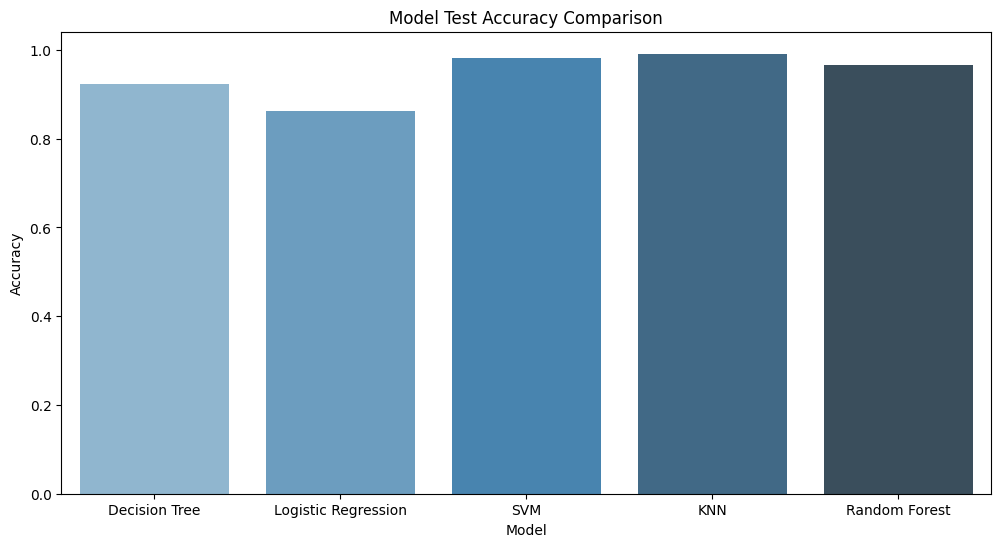

In [ ]:
# Compile model scores into a DataFrame
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'SVM', 'KNN', 'Random Forest'],
    'Training Accuracy': [dtc_train_accuracy, log_reg_train_accuracy, svm_train_accuracy, knn_train_accuracy, rf_train_accuracy],
    'Test Accuracy': [dtc_test_accuracy, log_reg_accuracy, svm_accuracy, knn_test_accuracy, rf_accuracy]
})

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results, palette='Blues_d')
plt.title('Model Test Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1181
           1       0.94      0.88      0.91      1203
           2       0.96      0.94      0.95      1208
           3       0.91      0.91      0.91      1182
           4       0.98      0.97      0.97      1175
           5       0.97      0.97      0.97      1207

    accuracy                           0.93      7156
   macro avg       0.93      0.93      0.93      7156
weighted avg       0.93      0.93      0.93      7156



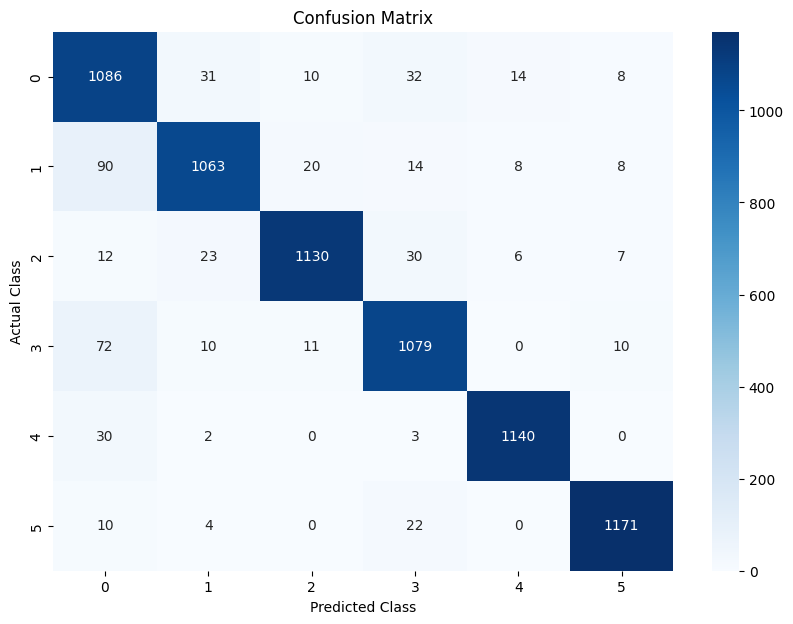

In [ ]:
# Evaluate model performance using metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()


 Calculates key evaluation metrics such as accuracy, precision, recall, and F1 score. These provide a holistic view of model performance.
 These metrics and visualizations provide insights into how well the model performs, with the confusion matrix indicating correct and incorrect classifications for each land cover class. The classification report gives precision, recall, F1 score, and support for each class.

Save

In [ ]:
joblib.dump(pipeline, 'land_cover_classifier.joblib')

['land_cover_classifier.joblib']

#Conclusion

This project demonstrated the automation of land cover classification using machine learning with satellite and crowdsourced data, despite challenges posed by noise and imbalances. Through model training and evaluation, the Random Forest classifier emerged as a reliable option, showcasing robust performance across various metrics. Such classification models can enhance decision-making in environmental and urban planning, paving the way for cost-effective and large-scale land management solutions.